# Import packages

In [45]:
current_path

PosixPath('/Users/dusiyi/Documents/Multifirefly-Project')

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os
if Path.cwd().parts[-1] != 'Multifirefly-Project':
    if Path.cwd().parts[-1] != 'notebooks':
        os.chdir('..')
    from add_path import find_path
    current_path = find_path()
    os.chdir(current_path)

from data_wrangling import specific_utils, process_monkey_information
from pattern_discovery import pattern_by_trials, pattern_by_trials, cluster_analysis, organize_patterns_and_features
from visualization.matplotlib_tools import plot_behaviors_utils
from non_behavioral_analysis.neural_data_analysis.get_neural_data import neural_data_processing
from non_behavioral_analysis.neural_data_analysis.visualize_neural_data import plot_neural_data, plot_modeling_result
from non_behavioral_analysis.neural_data_analysis.model_neural_data import cca_class, pgam_class, neural_data_modeling, reduce_multicollinearity
from non_behavioral_analysis.neural_data_analysis.neural_vs_behavioral import prep_monkey_data, prep_target_data, neural_vs_behavioral_class
from non_behavioral_analysis.neural_data_analysis.planning_neural import planning_neural_class, planning_neural_utils

import sys
import math
import gc
import subprocess
from pathlib import Path
from importlib import reload

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from scipy import linalg, interpolate
from scipy.signal import fftconvolve
from scipy.io import loadmat
from scipy import sparse
import torch
from numpy import pi

# Machine Learning imports
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.multivariate.cancorr import CanCorr

# Neuroscience specific imports
import neo
import rcca

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

%load_ext autoreload
%autoreload 2

Changed the directory to 'Multifirefly-Project'.
Added /Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods to the path.
done
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Retrieve data

In [3]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"

In [4]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Schro/data_0416"

In [5]:
data_item = neural_vs_behavioral_class.NeuralVsBehavioralClass(raw_data_folder_path=raw_data_folder_path)
data_item.streamline_preparing_neural_and_behavioral_data()

Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Retrieved ff_dataframe from all_monkey_data/processed_data/monkey_Schro/data_0416/ff_dataframe.h5
When take out monkey subset for GUAT, 144 clusters out of 254 are too close to the target or the last target. Those clusters are filtered out.
The number of new trials that are used to separate stop clusters is 470
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved all_trial_features
Retrieved feature_statistics
Retrieved scatter_around_target_df
Retrieved txt_neural_t_linreg.csv from all_monkey_data/time_calibration/monkey_Schro/data_0416/txt_neural_t_linreg.csv
               name   slope  intercept  r_value  p_value  std_err  \
0  adj by 1st txt t 0.00589   -4.91925  0.96885  0.15931  0.00150   

   slope x time  sample_size  
0       0.07221            3  
Updated window width (to get convolved d

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/neural_vs_behavioral/prep_monkey_data.py:220: RuntimeWarning: divide by zero encountered in divide
  rebinned_monkey_info_essential['stop_success_rate'] = num_caught_ff_convolved / \
/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/methods/non_behavioral_analysis/neural_data_analysis/neural_vs_behavioral/prep_monkey_data.py:220: RuntimeWarning: invalid value encountered in divide
  rebinned_monkey_info_essential['stop_success_rate'] = num_caught_ff_convolved / \


Number of bins in valid intervals based on ff caught time: 9523 out of 41911 (22.72%)


# Planning

## get data

In [6]:
ref_point_mode='distance'
ref_point_value=-150

normalize = False
eliminate_outliers = False
use_curvature_to_ff_center = False
curv_of_traj_mode = 'distance'
window_for_curv_of_traj=[-25, 25]

pn = planning_neural_class.PlanningAndNeural(raw_data_folder_path=raw_data_folder_path)
pn.streamline_organizing_info(ref_point_mode='time after cur ff visible', ref_point_value=0.1, 
                               curv_of_traj_mode=curv_of_traj_mode, window_for_curv_of_traj=window_for_curv_of_traj, truncate_curv_of_traj_by_time_of_capture=True,
                               use_curvature_to_ff_center=use_curvature_to_ff_center,  eliminate_outliers=eliminate_outliers)


Retrieved monkey_information
The number of points that were removed due to delta_position exceeding the ceiling is 0
Note: ff_caught_T_sorted is replaced with ff_caught_T_new
Removed 0 rows out of 225 rows where cur_ff was not visible bbas or nxt_ff was not visible both bbas and bsans
shared_stops_near_ff_df has 225 rows
Retrieving shared_stops_near_ff_df succeeded
Retrieving stop_0_1_window_-50cm_0cm from all_monkey_data/planning/monkey_Schro/data_0416/diff_in_curv_df/norm_opt_arc/test/stop_0_1_window_-50cm_0cm succeeded
Retrieving Schro_stop_0_1 from all_monkey_data/planning/monkey_Schro/data_0416/heading_info_df/norm_opt_arc/test/Schro_stop_0_1 succeeded


In [7]:
pn.retrieve_neural_data()

Retrieved txt_neural_t_linreg.csv from all_monkey_data/time_calibration/monkey_Schro/data_0416/txt_neural_t_linreg.csv
               name   slope  intercept  r_value  p_value  std_err  \
0  adj by 1st txt t 0.00589   -4.91925  0.96885  0.15931  0.00150   

   slope x time  sample_size  
0       0.07221            3  
Updated window width (to get convolved data):  1


In [8]:
pn.get_all_planning_info()

Having processed 0 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 10 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 20 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 30 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 40 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 50 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 60 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 70 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.
Having processed 80 rows out of 89 of the stops_near_ff_df for both_ff_across_time_df.


point_index  nxt_ff_angle  nxt_ff_distance  nxt_arc_curv  \
0            1386      -0.34233        665.76801      -0.00101   
1            1629       0.11945        178.36937       0.00134   
2            1614       0.13918        223.80315       0.00124   
3            1599       0.13427        268.22032       0.00100   
4            1584       0.14642        309.71158       0.00094   
...           ...           ...              ...           ...   
1433       144039       0.11878        385.86338       0.00061   
1434       144024       0.06069        416.81093       0.00029   
1435       144009       0.06751        418.04234       0.00032   
1436       144084       0.05774        248.49601       0.00046   
1437       144207           NaN              NaN           NaN   

      nxt_opt_arc_curv  nxt_opt_arc_dheading  time_rel_to_stop  traj_curv  \
0             -0.00107              -0.72408          -1.89241   -0.00145   
1              0.00119               0.21249           2.10818    0.00119   
2              0.00090               0.20165           1.85918    0.00090   
3              0.00058               0.15734           1.61014    0.00014   
4              0.00125               0.38616           1.36117    0.00174   
...                ...                   ...               ...        ...   
1433           0.00041               0.16030          -1.34469   -0.00141   
1434           0.00012               0.04944          -1.59361   -0.00019   
1435           0.00015               0.06332          -1.84258   -0.00015   
1436           0.00095               0.23462          -0.59761    0.00105   
1437               NaN                   NaN               NaN        NaN   

      cur_ff_angle  cur_ff_distance  cur_arc_curv  cur_opt_arc_curv  \
0         -0.42190        257.71837      -0.00318          -0.00277   
1              NaN              NaN           NaN               NaN   
2              NaN              NaN           NaN               NaN   
3              NaN              NaN           NaN               NaN   
4              NaN              NaN           NaN               NaN   
...            ...              ...           ...               ...   
1433       0.06386        235.78611       0.00054           0.00000   
1434       0.00846        266.83057       0.00006           0.00000   
1435       0.01541        268.06418       0.00012           0.00000   
1436       0.00096         97.76695       0.00002           0.00105   
1437           NaN              NaN           NaN               NaN   

      cur_opt_arc_dheading  stop_point_index   bin  \
0                 -0.74268              1500    92   
1                      NaN              1500   108   
2                      NaN              1500   107   
3                      NaN              1500   106   
4                      NaN              1500   105   
...                    ...               ...   ...   
1433               0.00040            144120  9539   
1434               0.00027            144120  9538   
1435               0.00027            144120  9537   
1436               0.10187            144120  9542   
1437                   NaN            144120  9550   

      angle_from_m_before_stop_to_cur_ff  angle_from_m_before_stop_to_nxt_ff  \
0                                0.34224                             0.47654   
1                                0.34224                             0.47654   
2                                0.34224                             0.47654   
3                                0.34224                             0.47654   
4                                0.34224                             0.47654   
...                                  ...                                 ...   
1433                            -0.42429                            -0.00839   
1434                            -0.42429                            -0.00839   
1435                            -0.42429                          

In [24]:
print(pn.both_ff_across_time_df.shape)
pn.both_ff_across_time_df.head(5)

(1438, 15)


point_index  nxt_ff_angle  nxt_ff_distance  nxt_arc_curv  nxt_opt_arc_curv  \
0         1386      -0.34233        665.76801      -0.00101          -0.00107   
1         1629       0.11945        178.36937       0.00134           0.00119   
2         1614       0.13918        223.80315       0.00124           0.00090   
3         1599       0.13427        268.22032       0.00100           0.00058   
4         1584       0.14642        309.71158       0.00094           0.00125   

   nxt_opt_arc_dheading  time_rel_to_stop  traj_curv  cur_ff_angle  \
0              -0.72408          -1.89241   -0.00145      -0.42190   
1               0.21249           2.10818    0.00119           NaN   
2               0.20165           1.85918    0.00090           NaN   
3               0.15734           1.61014    0.00014           NaN   
4               0.38616           1.36117    0.00174           NaN   

   cur_ff_distance  cur_arc_curv  cur_opt_arc_curv  cur_opt_arc_dheading  \
0        257.71837      -0.00318          -0.00277              -0.74268   
1              NaN           NaN               NaN                   NaN   
2              NaN           NaN               NaN                   NaN   
3              NaN           NaN               NaN                   NaN   
4              NaN           NaN               NaN                   NaN   

   stop_point_index  bin  
0              1500   92  
1              1500  108  
2              1500  107  
3              1500  106  
4              1500  105

In [10]:
columns_to_drop = ['nxt_opt_arc_dheading',
    'nxt_arc_curv',
  'angle_from_cur_ff_landing_to_nxt_ff',
  
 # preserve "alt + alt" or 'stop + stop' but not 'alt + stop' or 'stop + alt'. Otherwise the correlation shall be too great
#  'nxt_ff_distance_when_cur_ff_first_seen',
#  'nxt_ff_distance_when_cur_ff_last_seen',
#  'cur_ff_distance_when_nxt_ff_first_seen',
#  'cur_ff_distance_when_nxt_ff_last_seen',
#  'cur_ff_angle_when_nxt_ff_first_seen',
#  'nxt_ff_angle_when_cur_ff_first_seen',
#  'cur_ff_angle_when_nxt_ff_last_seen',
#  'nxt_ff_angle_when_cur_ff_last_seen',
]


In [11]:
# drop rows with NA in all_planning_info and print the percentage of rows dropped
all_planning_info2 = pn.all_planning_info.drop(columns=columns_to_drop, errors='ignore').copy()
all_planning_info2 = all_planning_info2.dropna().copy()
all_planning_info2.drop(columns={'stop_point_index', 'point_index'}, inplace=True)
print("Percentage of rows dropped: ", 1 - all_planning_info2.shape[0] / len(pn.all_planning_info))
data_item.y_var = all_planning_info2.copy()

_, pn.binned_spikes_df = neural_data_processing.prepare_binned_spikes_matrix_and_df(pn.all_binned_spikes, data_item.max_bin)
pn.binned_spikes_df['bin'] = np.arange(pn.binned_spikes_df.shape[0])
neural_bins_sub2 = pn.binned_spikes_df[pn.binned_spikes_df['bin'].isin(all_planning_info2['bin'].values)]
data_item.x_var = neural_bins_sub2.drop(columns=['bin'])

Percentage of rows dropped:  0.5305980528511822


In [12]:
pn.all_planning_info.shape

(1438, 18)

In [13]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.DataFrame(pn.all_planning_info.isnull().sum())

0
point_index                            0
nxt_ff_angle                          52
nxt_ff_distance                       52
nxt_arc_curv                          52
nxt_opt_arc_curv                      52
nxt_opt_arc_dheading                  52
time_rel_to_stop                      52
traj_curv                             52
cur_ff_angle                         727
cur_ff_distance                      727
cur_arc_curv                         727
cur_opt_arc_curv                     727
cur_opt_arc_dheading                 727
stop_point_index                       0
bin                                    0
angle_from_m_before_stop_to_cur_ff    91
angle_from_m_before_stop_to_nxt_ff    91
angle_from_cur_ff_landing_to_nxt_ff   91

In [14]:
print('data_item.x_var.shape:', data_item.x_var.shape)
print('binned_spikes_df.shape:', pn.binned_spikes_df.shape)
print('data_item.y_var.shape:', data_item.y_var.shape)

data_item.x_var.shape: (675, 86)
binned_spikes_df.shape: (14396, 87)
data_item.y_var.shape: (675, 13)


nxt_ff_angle, R: 0.42, R^2: 0.173, overall_p: 0.0099527046510325
nxt_ff_distance, R: 0.42, R^2: 0.176, overall_p: 0.0069281582999916325


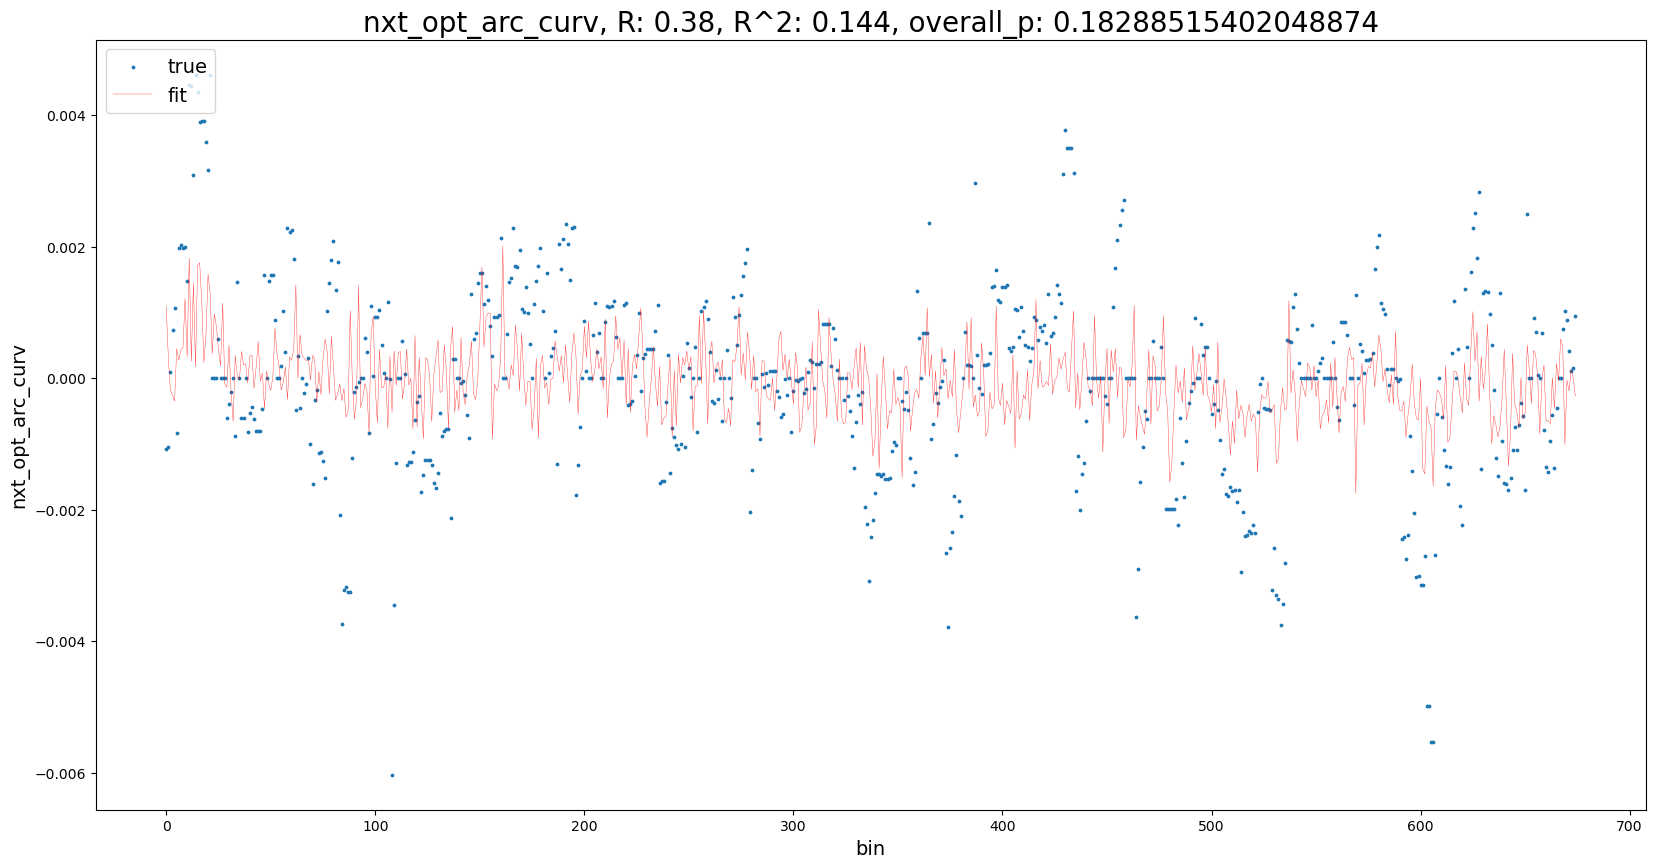

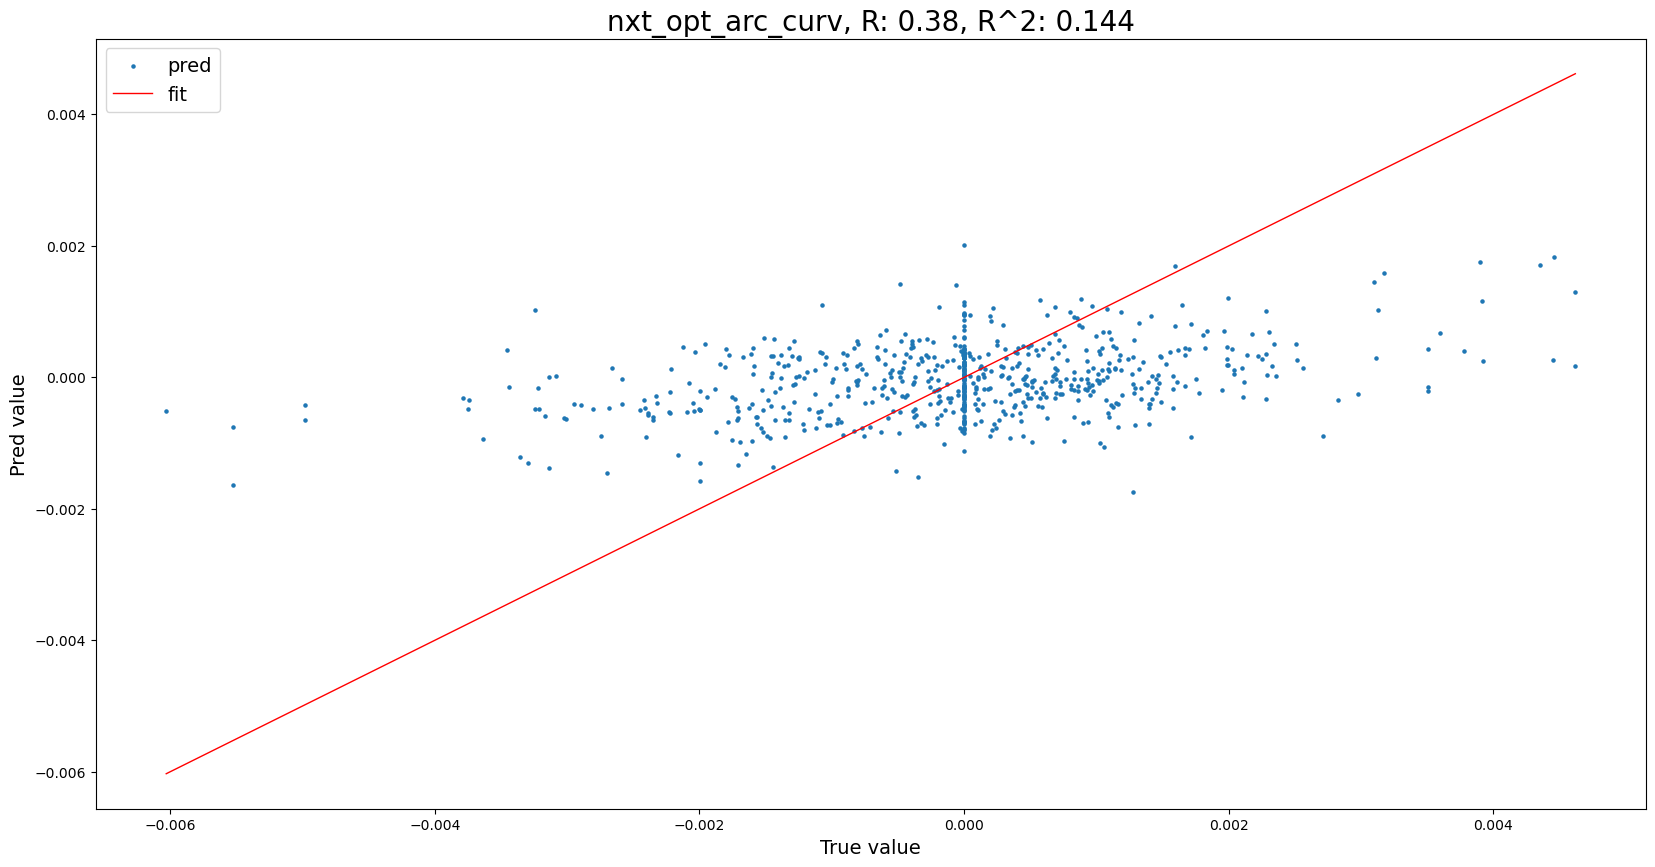

time_rel_to_stop, R: 0.41, R^2: 0.171, overall_p: 0.012484353888234441


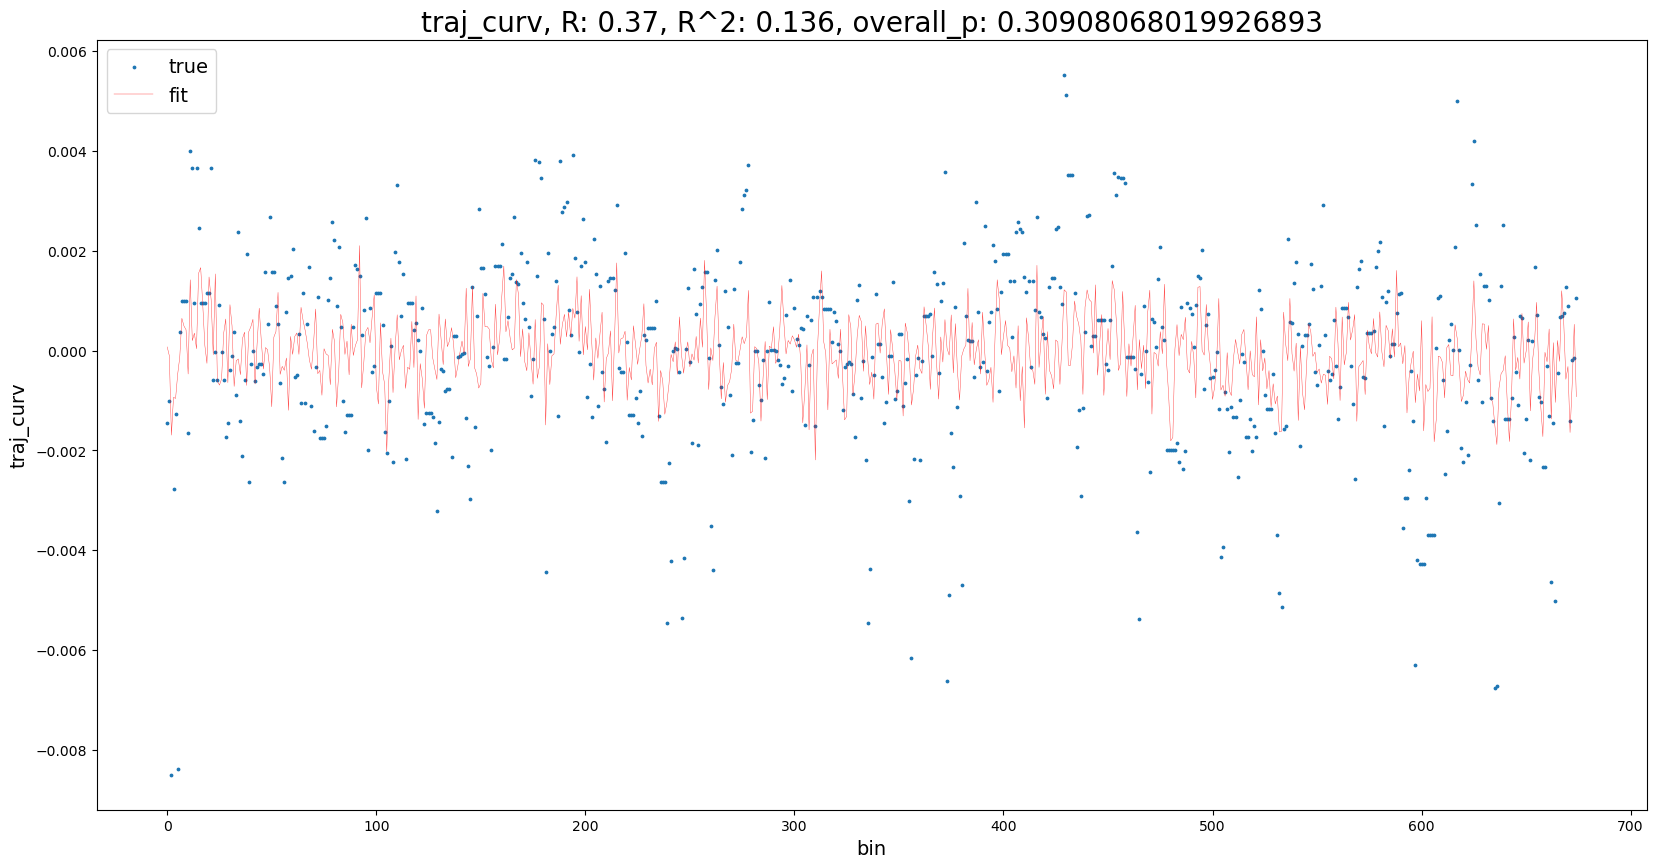

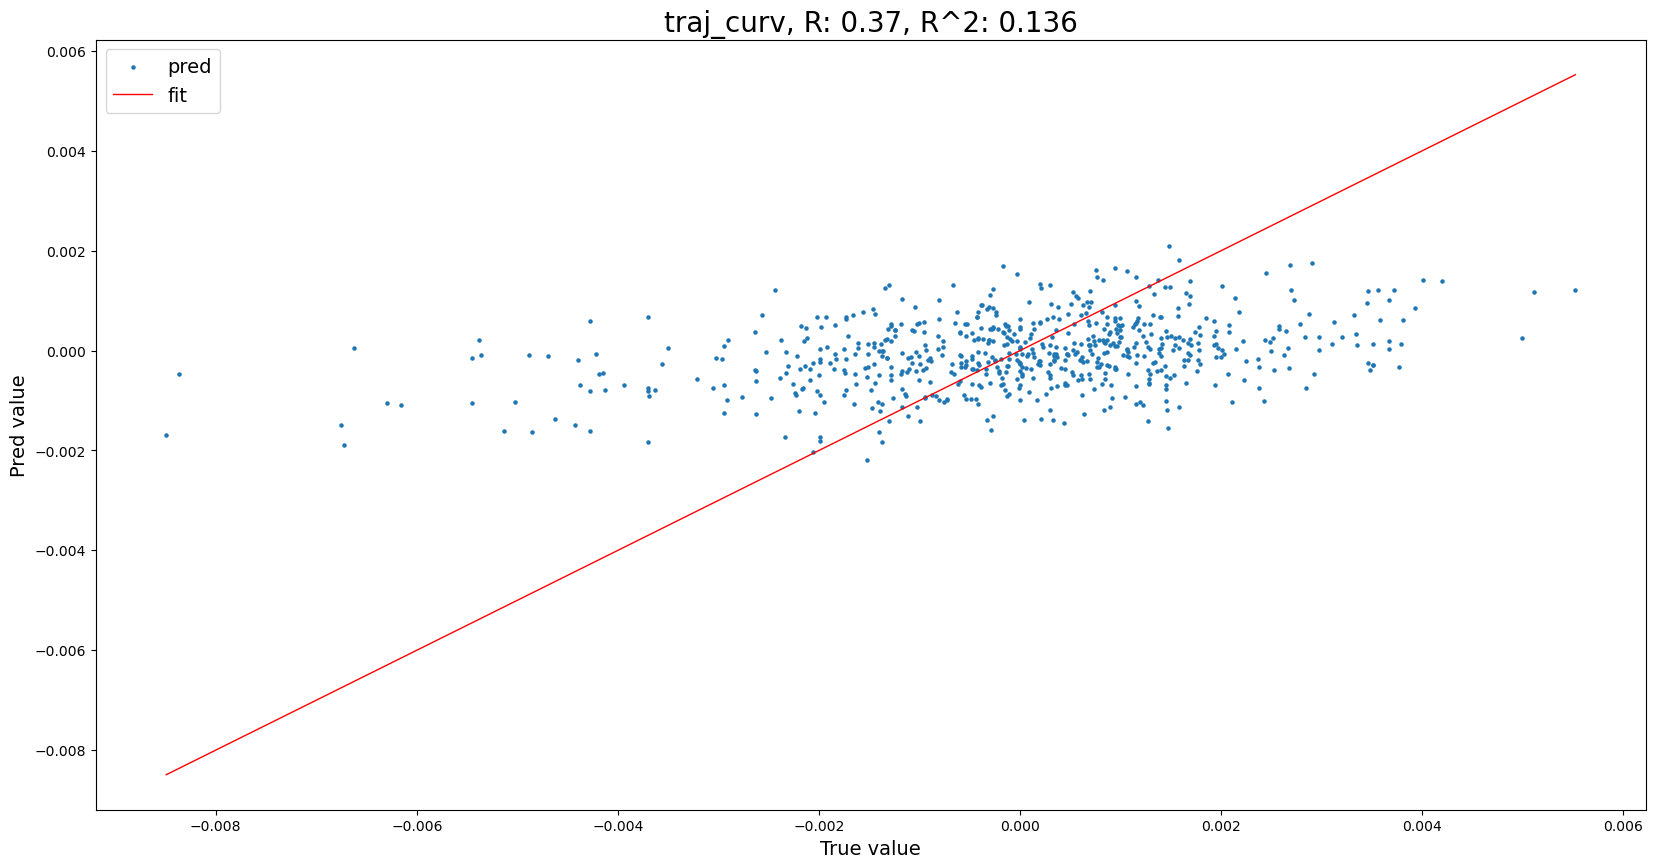

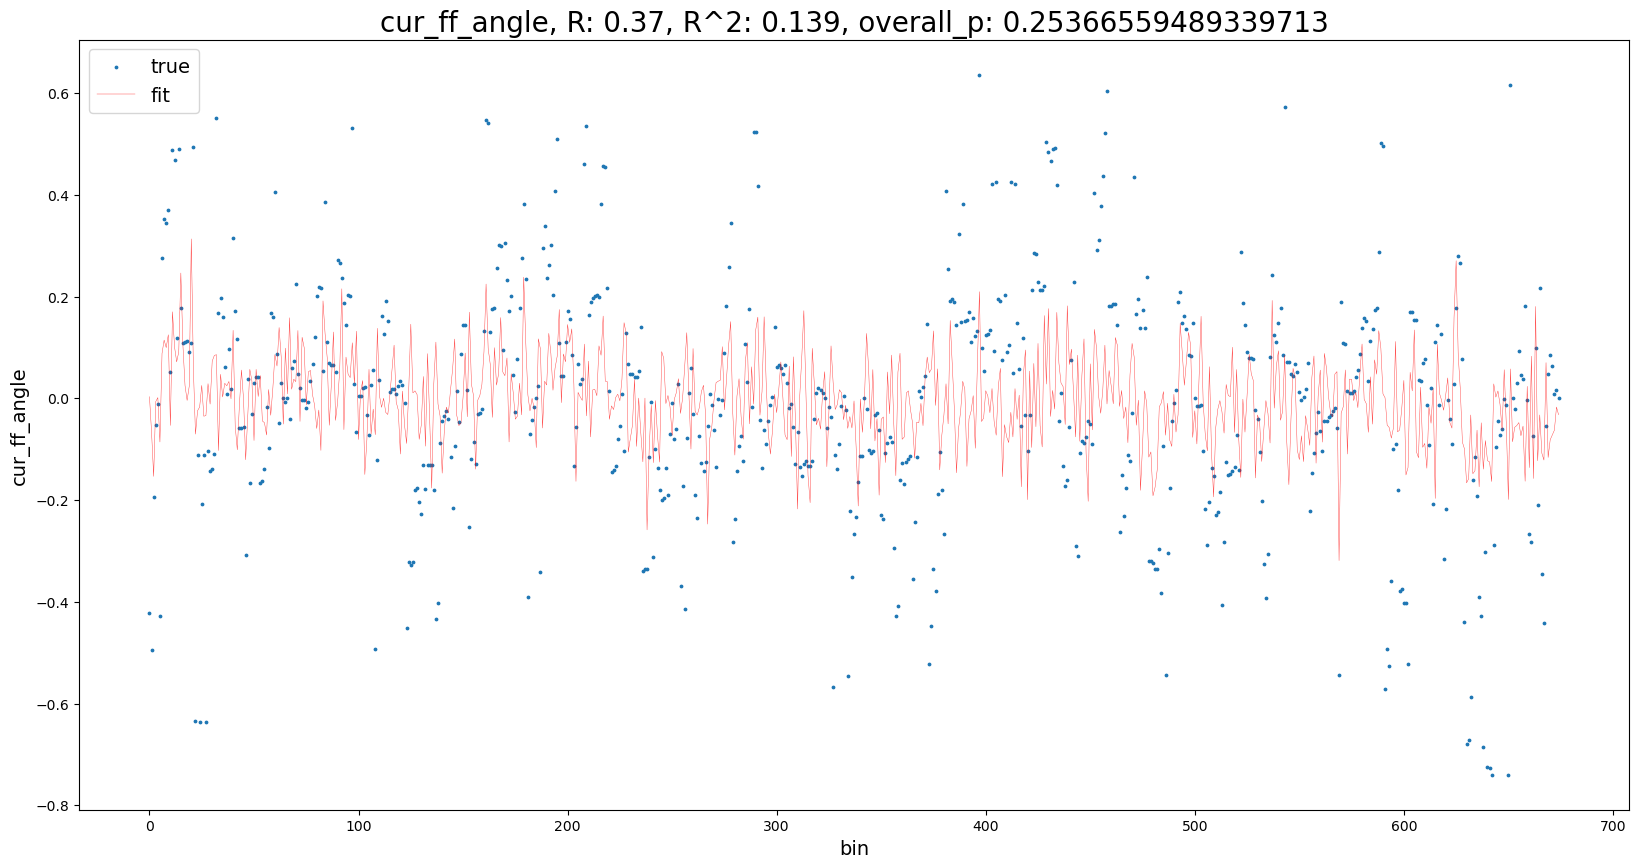

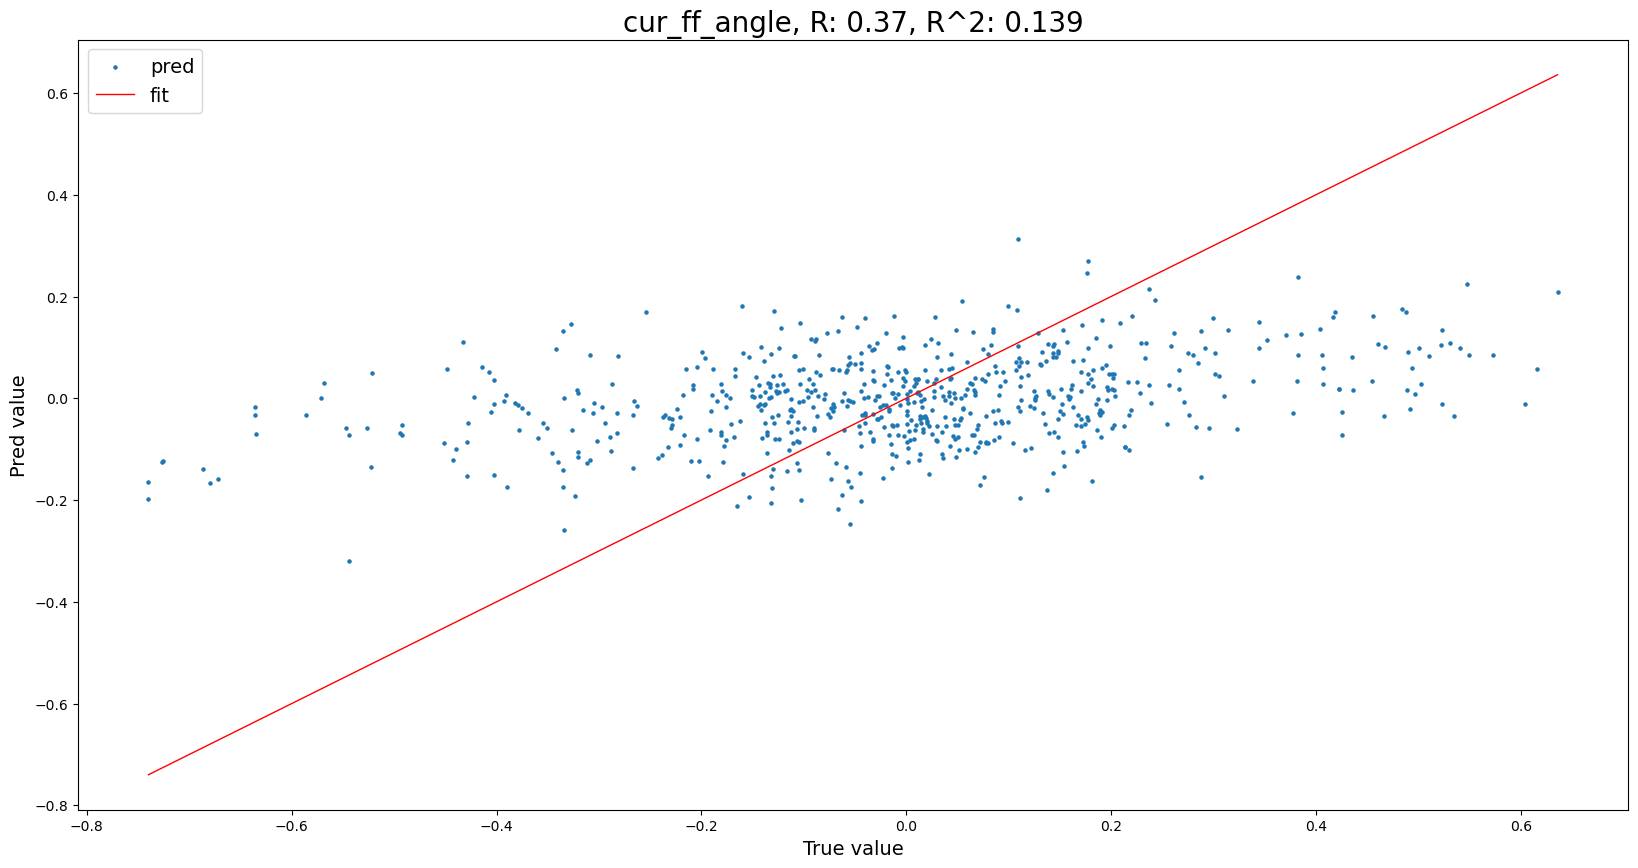

cur_ff_distance, R: 0.42, R^2: 0.174, overall_p: 0.008409507027965855


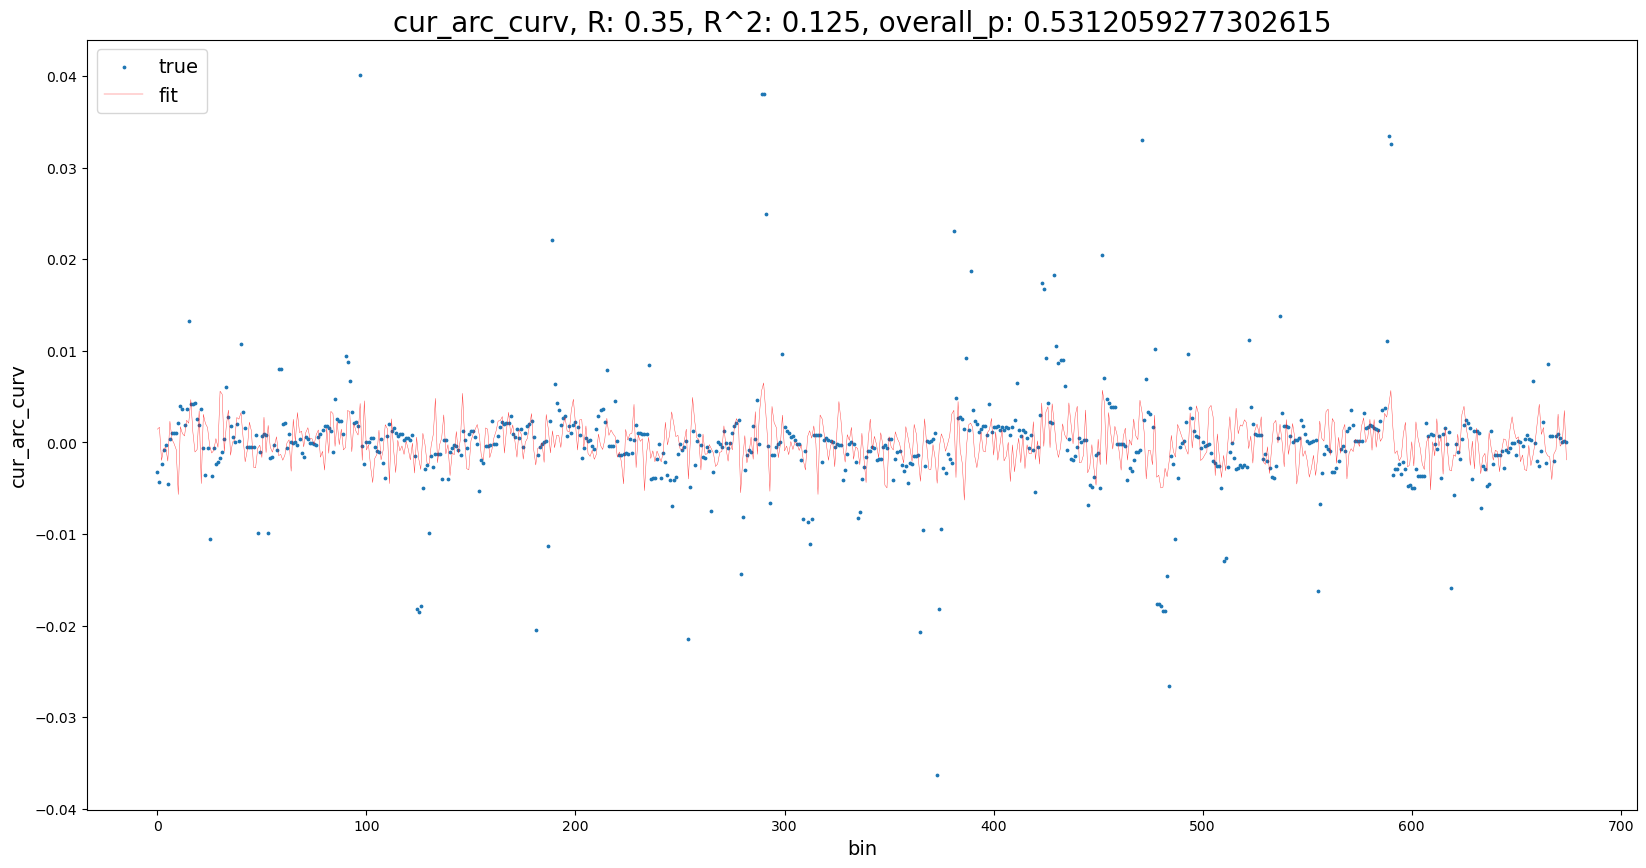

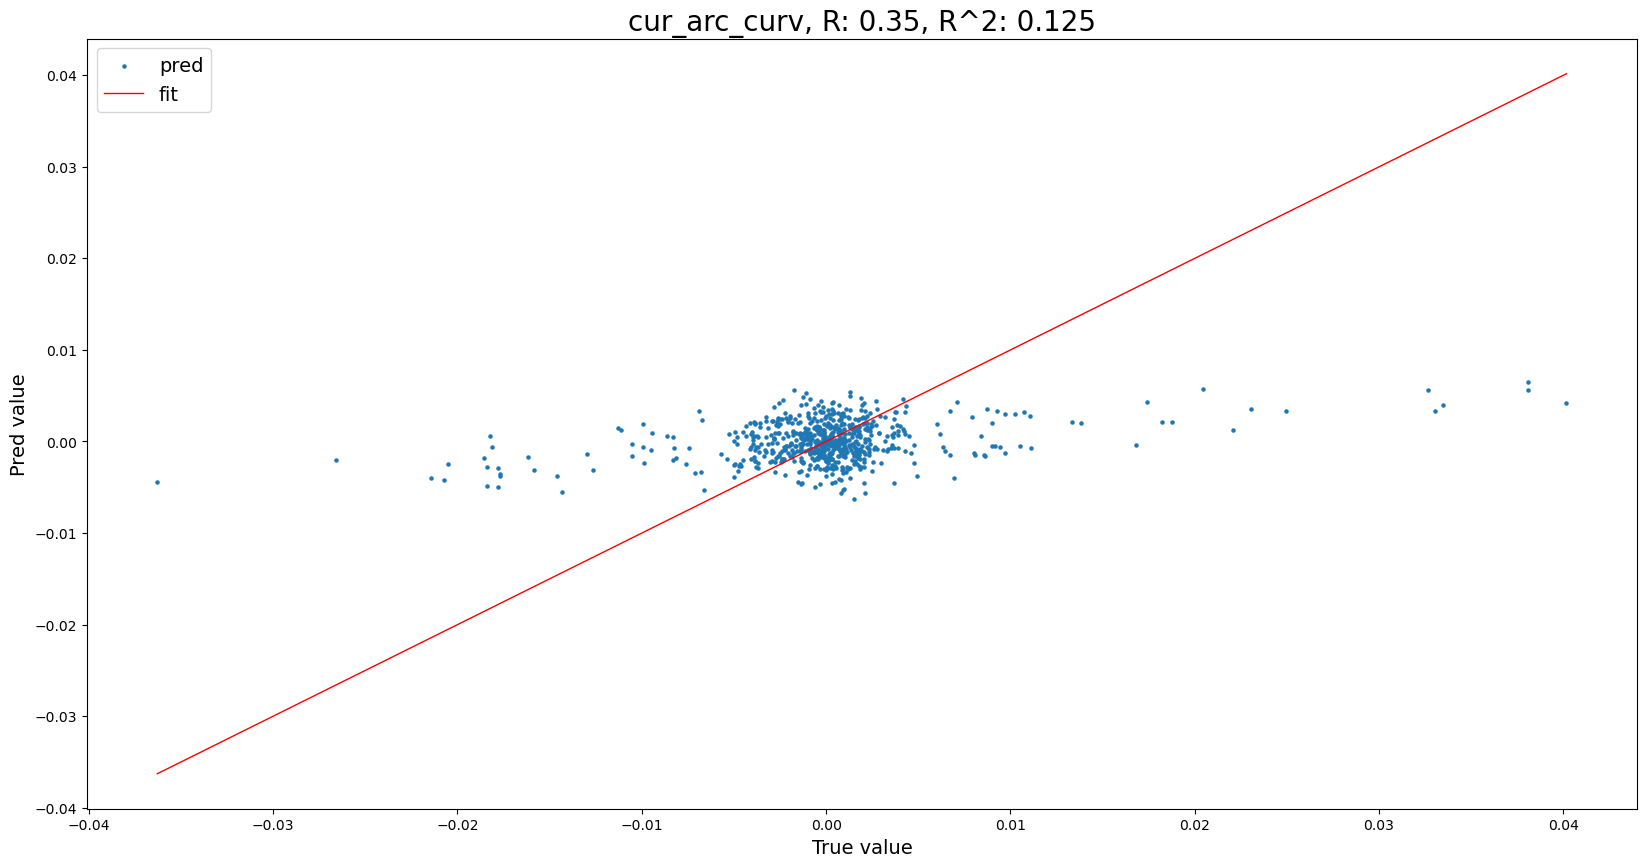

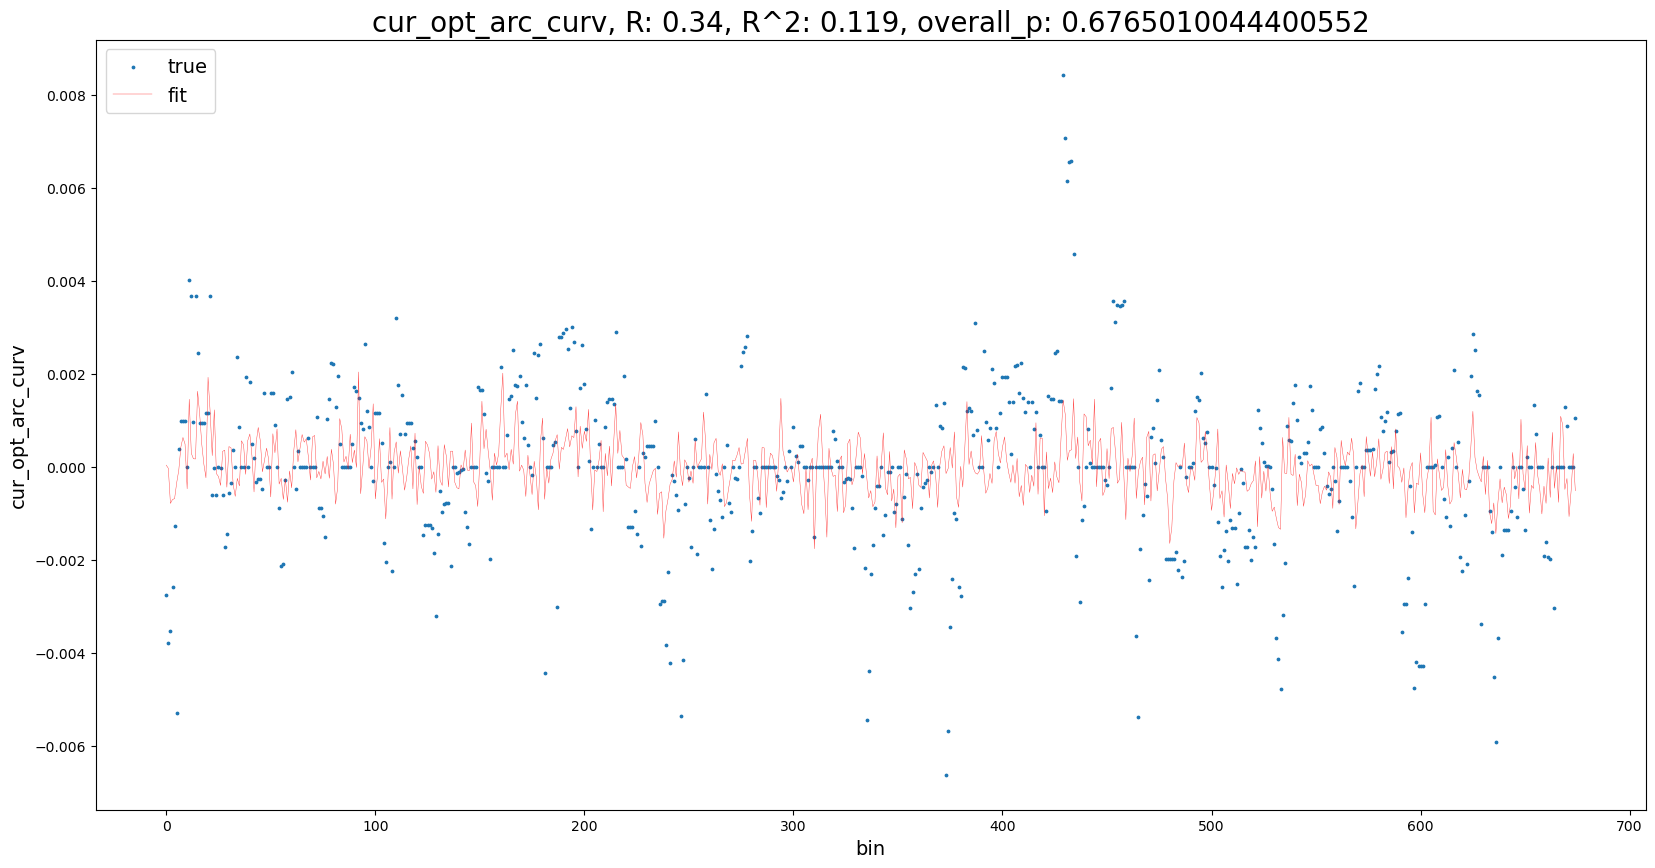

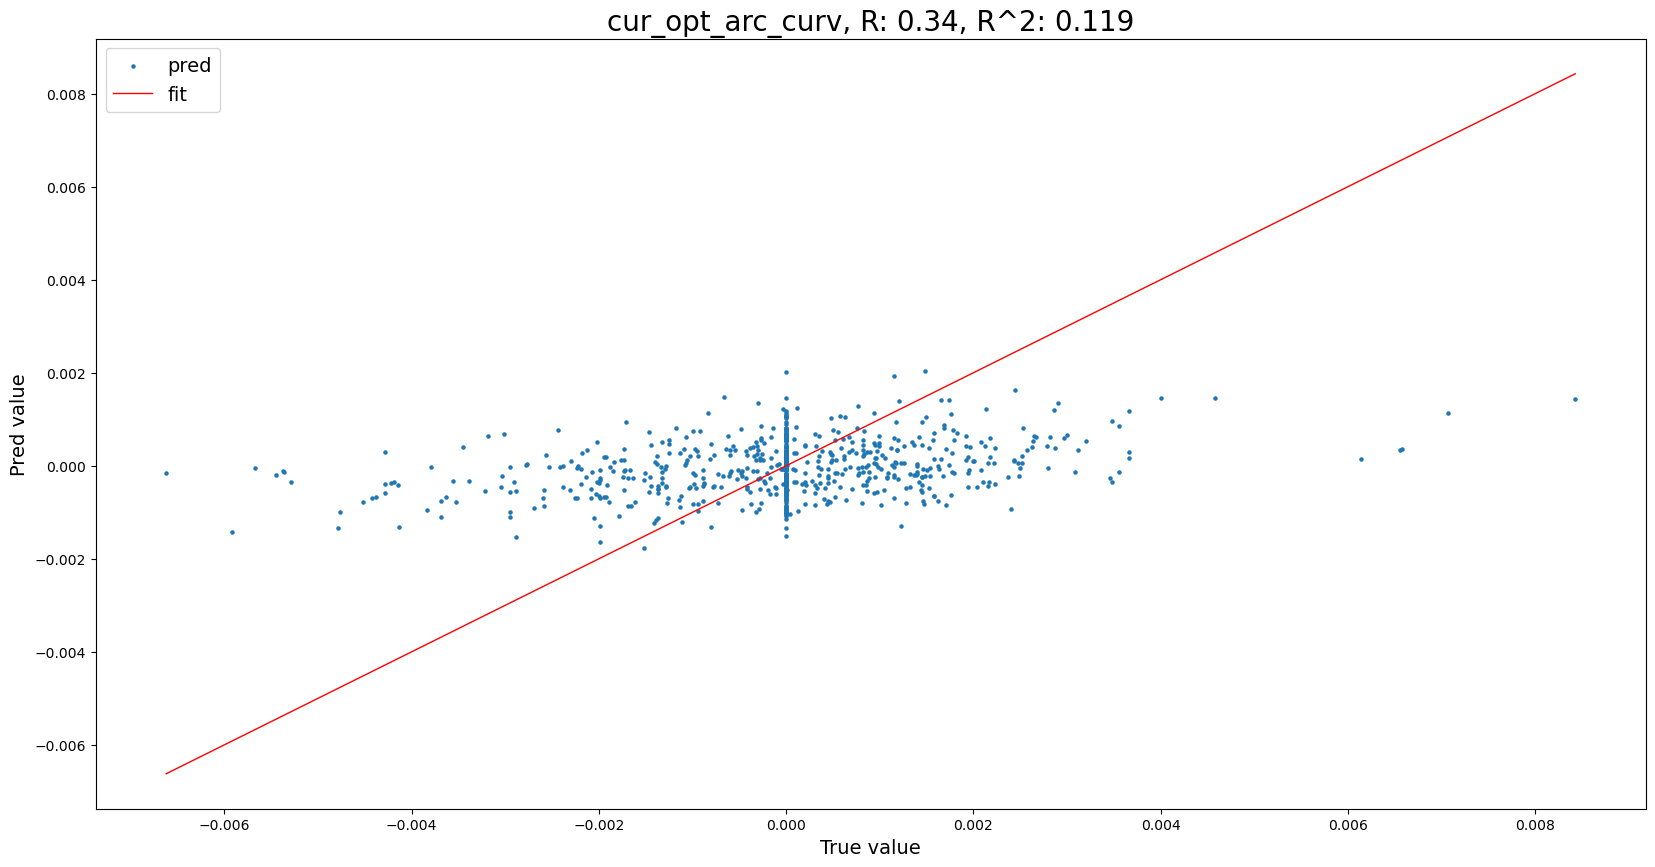

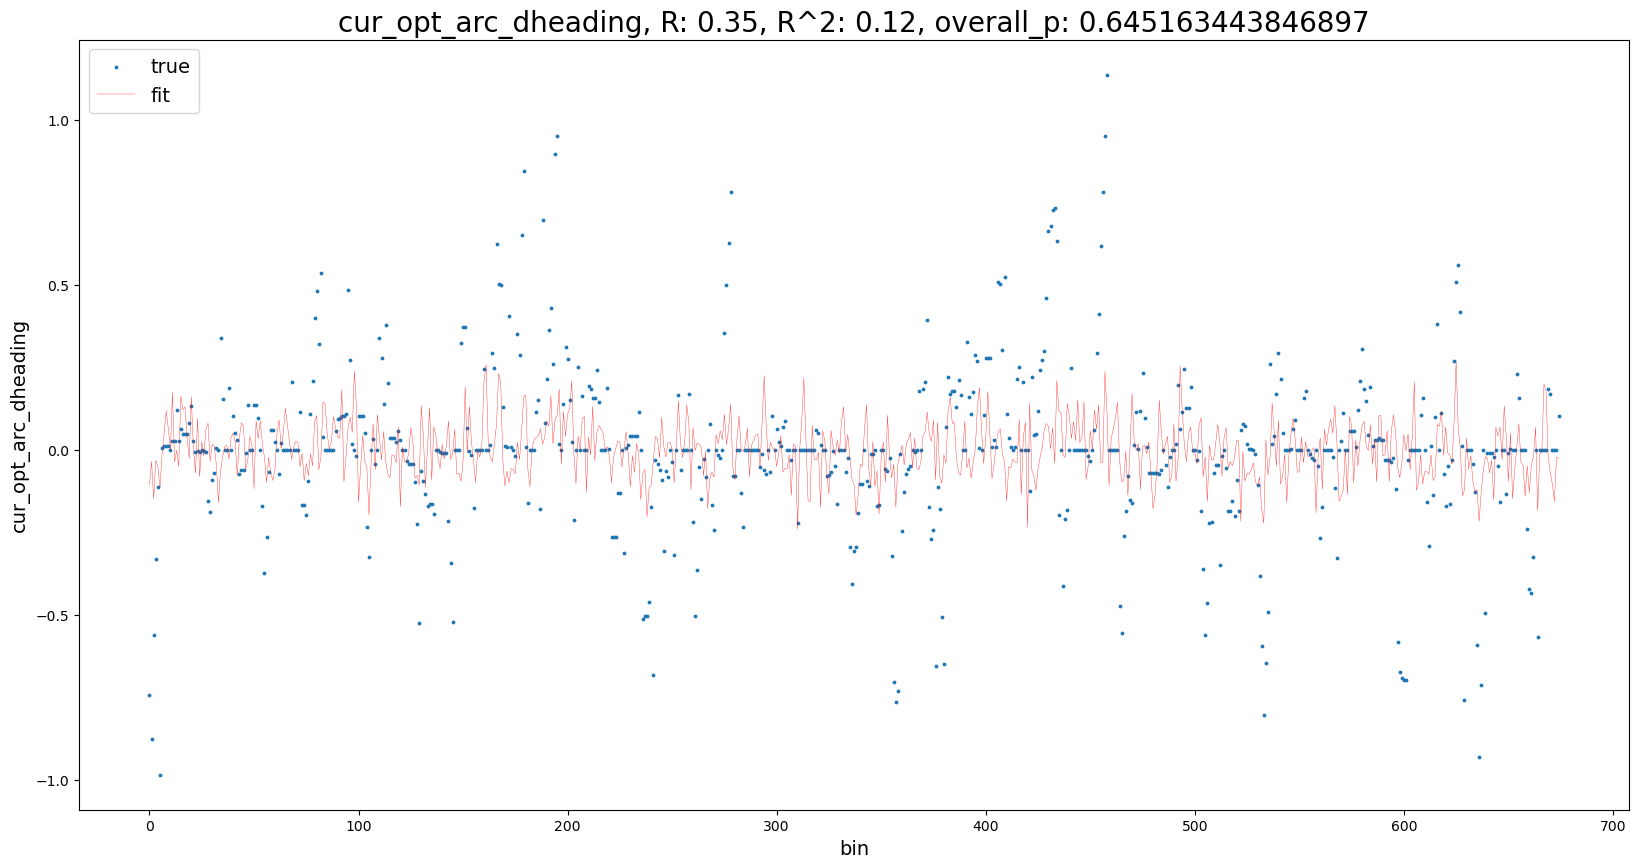

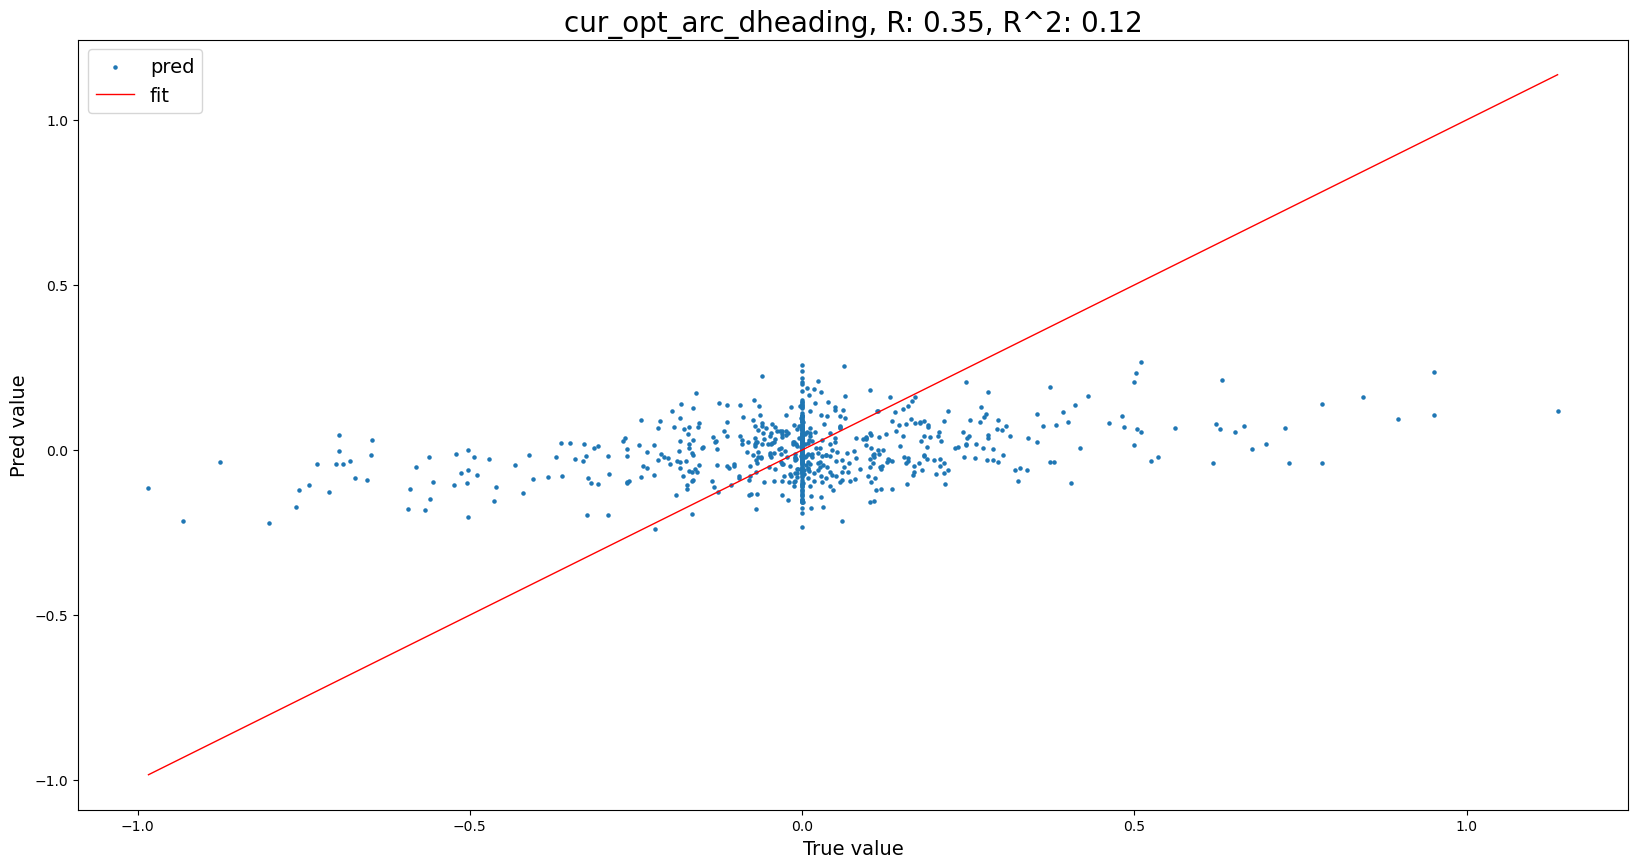

bin, R: 0.75, R^2: 0.56, overall_p: 2.46798482189341e-62
angle_from_m_before_stop_to_cur_ff, R: 0.42, R^2: 0.173, overall_p: 0.009650484809236875
angle_from_m_before_stop_to_nxt_ff, R: 0.41, R^2: 0.171, overall_p: 0.0124850429802645


In [29]:
# conduct linear regression on X and y
plt.rcParams["figure.figsize"] = (20, 10)
bins_to_plot = range(all_planning_info2.bin.max())
for i, column in enumerate(data_item.y_var.columns):
    plot_neural_data.plot_regression(data_item.y_var, column, data_item.x_var, bins_to_plot=None, min_r_squared_to_plot=0.3)
    # if i == 3:
    #     break

### VIF

In [16]:
vif = pd.DataFrame({
    "vif": [variance_inflation_factor(data_item.y_var.values, i) for i in range(data_item.y_var.shape[1])],
    "features": data_item.y_var.columns
}).sort_values(by='vif', ascending=False).round(1)
vif.reset_index(drop=False, inplace=True)

vif

index      vif                            features
0       0 13.30000                        nxt_ff_angle
1       6 12.30000                     cur_ff_distance
2       3 11.30000                    time_rel_to_stop
3       8 10.30000                    cur_opt_arc_curv
4       2  9.30000                    nxt_opt_arc_curv
5       9  6.70000                cur_opt_arc_dheading
6       1  6.60000                     nxt_ff_distance
7       4  5.50000                           traj_curv
8      12  3.90000  angle_from_m_before_stop_to_nxt_ff
9       5  2.80000                        cur_ff_angle
10     10  2.60000                                 bin
11      7  1.90000                        cur_arc_curv
12     11  1.30000  angle_from_m_before_stop_to_cur_ff

In [17]:
specific_columns = vif.iloc[:15].features.values
specific_columns

array(['nxt_ff_angle', 'cur_ff_distance', 'time_rel_to_stop',
       'cur_opt_arc_curv', 'nxt_opt_arc_curv', 'cur_opt_arc_dheading',
       'nxt_ff_distance', 'traj_curv',
       'angle_from_m_before_stop_to_nxt_ff', 'cur_ff_angle', 'bin',
       'cur_arc_curv', 'angle_from_m_before_stop_to_cur_ff'], dtype=object)

In [18]:
fff = [feature for feature in vif.features.tolist() if ('nxt' in feature) and ('cur' in feature)]
fff

['nxt_opt_arc_curv']

In [19]:
fff = [feature for feature in vif.features.tolist() if ('nxt_arc_' in feature) or ('nxt_opt' in feature)]
fff

['nxt_opt_arc_curv']

In [20]:
 specific_columns = ['cur_ff_distance',
 'cur_ff_angle',
 'cur_opt_arc_dheading',
 'cur_arc_curv']

 specific_columns = ['cur_ff_angle',
 'cur_ff_distance',
 'cur_opt_arc_dheading',
 'cur_opt_arc_curv',
 'cur_arc_curv']

In [21]:
 specific_columns = ['nxt_ff_angle',
 'nxt_ff_distance',
 'nxt_opt_arc_dheading',
 'nxt_opt_arc_curv',
 'nxt_arc_curv']

In [22]:
fff = [feature for feature in vif.features.tolist() if ('nxt' in feature) & ('first_seen' not in feature) & ('last_seen' in feature)]
fff

[]

### Correlations between features

In [30]:
columns_to_drop = ['nxt_opt_arc_dheading',
    'nxt_arc_curv',
  'angle_from_cur_ff_landing_to_nxt_ff',
]
  

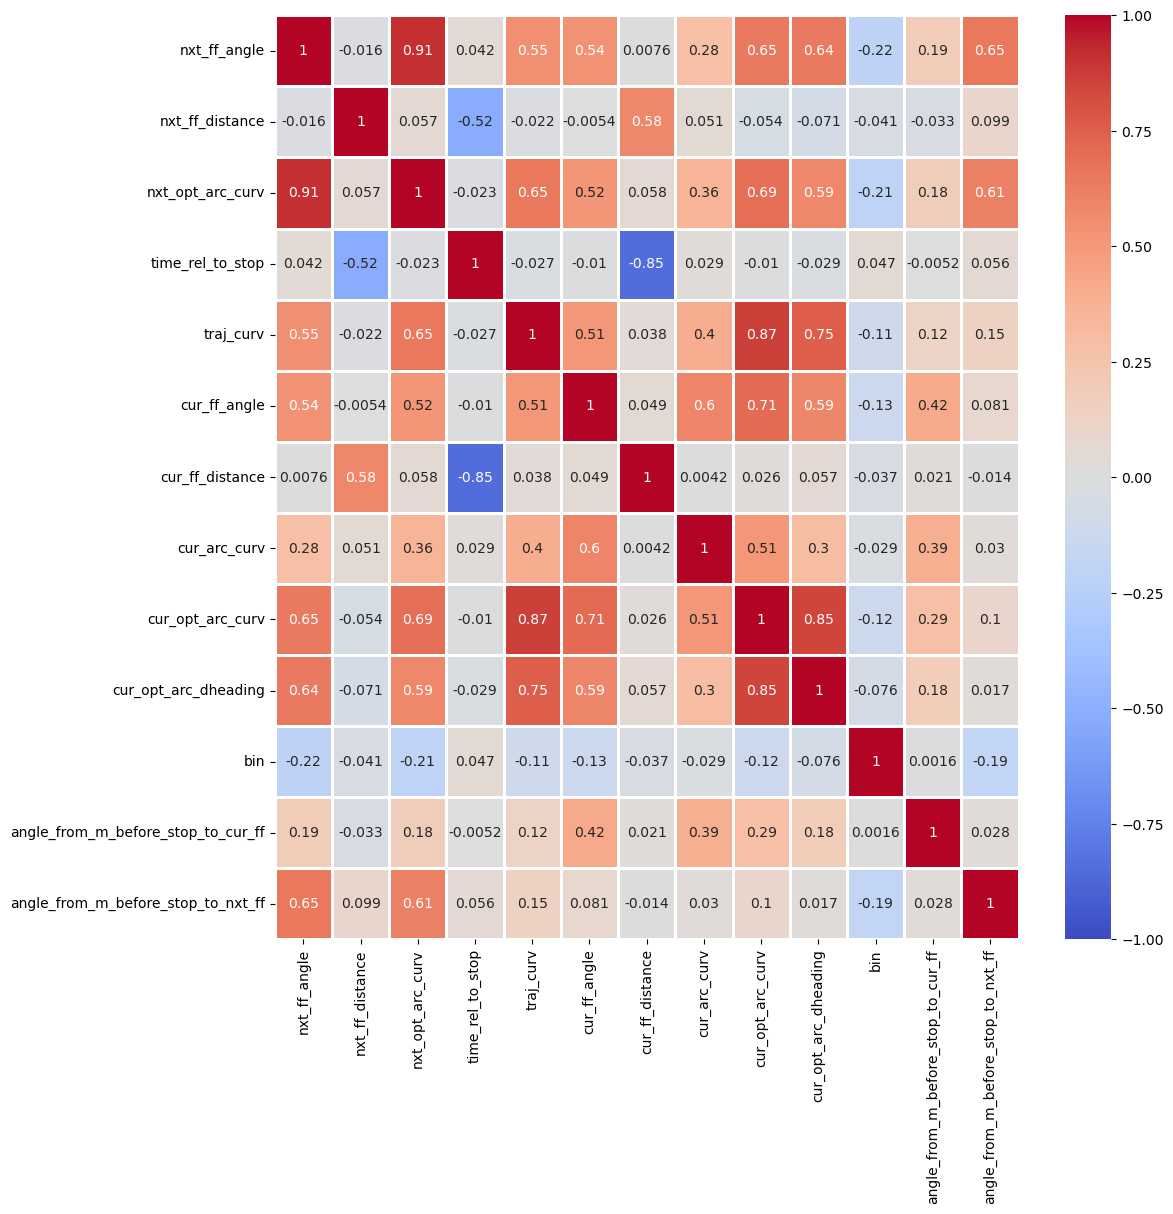

In [31]:
# calculate the correlation coefficient among the columns with VIF > 5
# specific_columns = vif[vif["vif"] > 5].features.values
specific_columns = data_item.y_var.columns
corr_coeff = data_item.y_var[specific_columns].corr()
#plt.figure(figsize = (6, 6))
plt.figure(figsize = (12, 12))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)
plt.show()

# CCA

https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

## No lagging

In [32]:
cca_no_lag = cca_class.CCAclass(X1=data_item.x_var, X2=data_item.y_var, lagging_included=False)

Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.75528 0.52116 0.48135 0.43971 0.41816 0.40527 0.39529 0.35391 0.33799
 0.31412]
% Shared Variance: [0.57045 0.27161 0.2317  0.19335 0.17486 0.16425 0.15625 0.12525 0.11424
 0.09867]


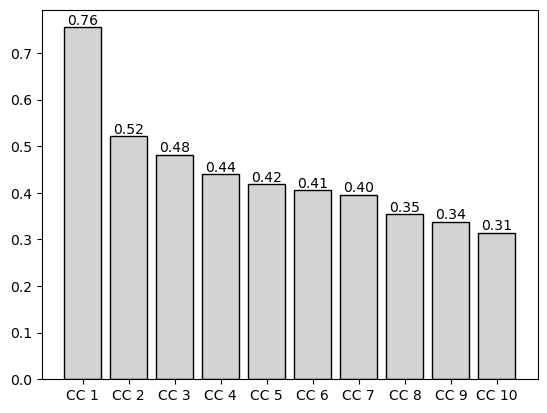

In [33]:
cca_no_lag.conduct_cca()
cca_inst = cca_no_lag

## loadings

### neurons

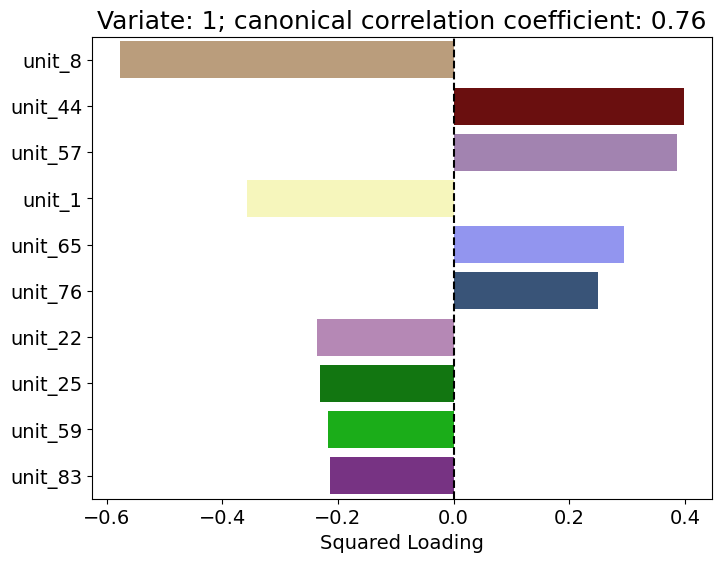

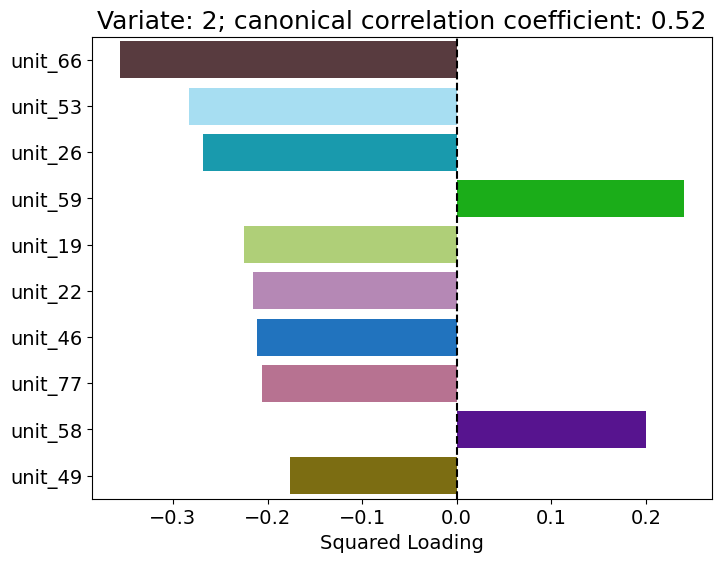

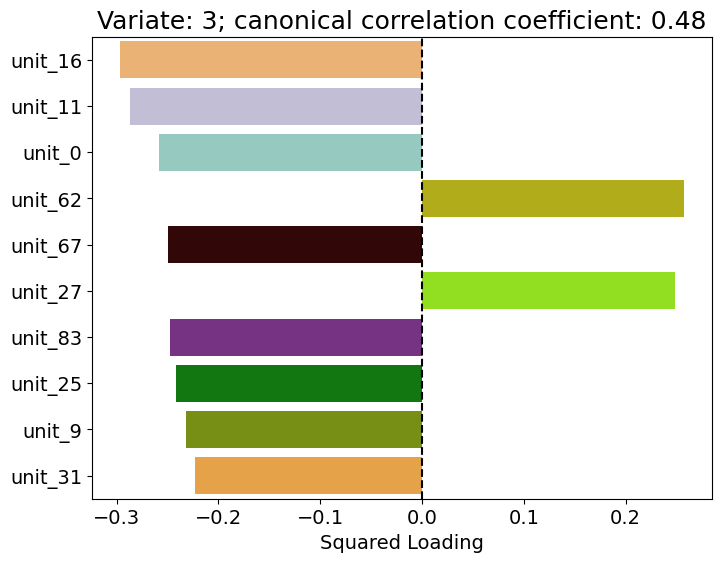

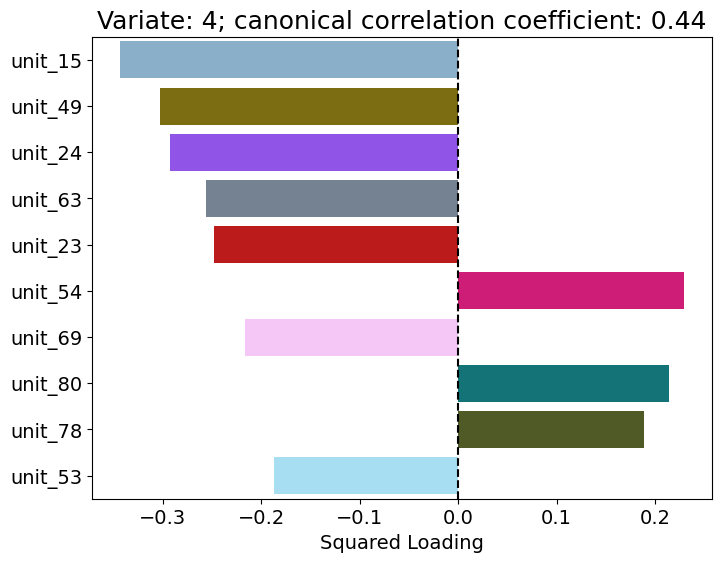

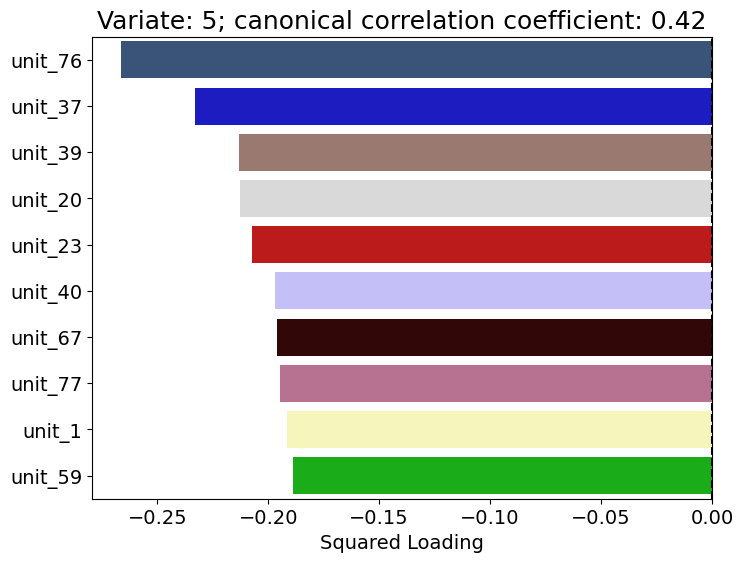

In [34]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1', squared=False)

### behavior

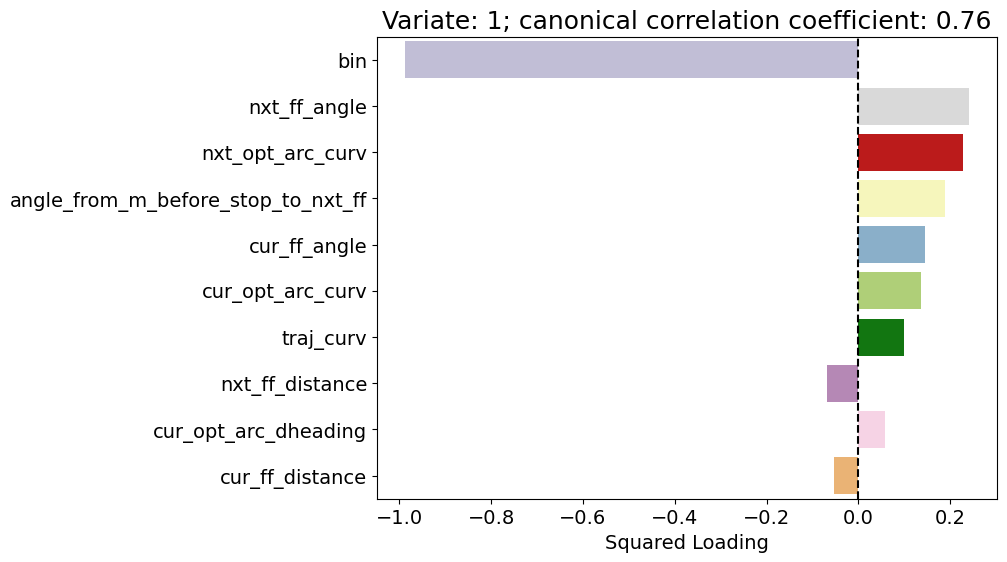

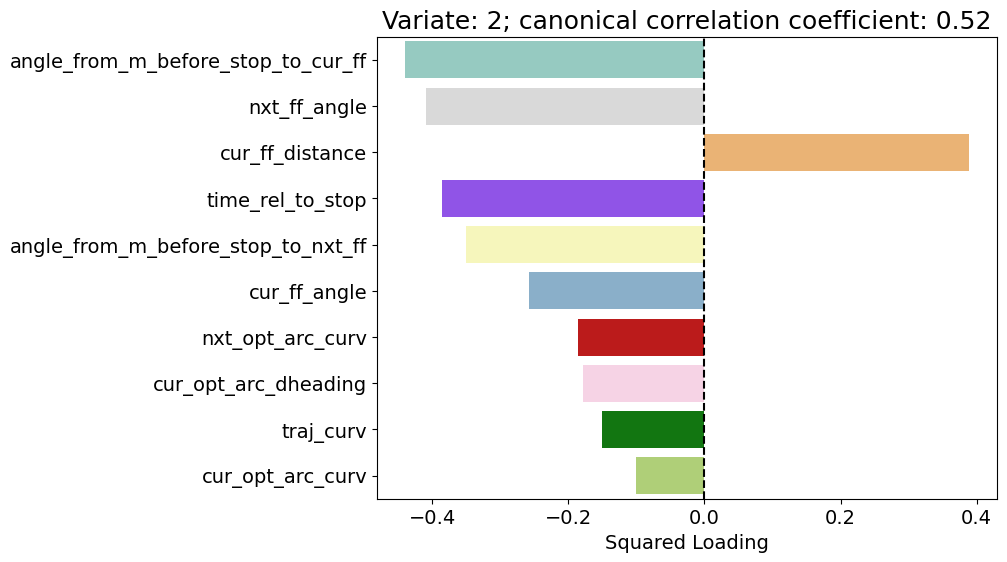

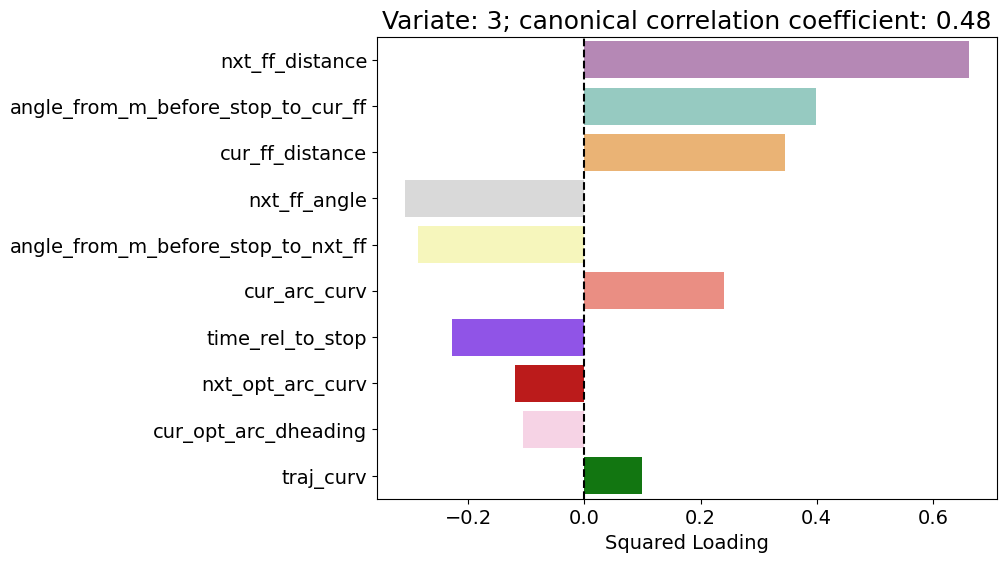

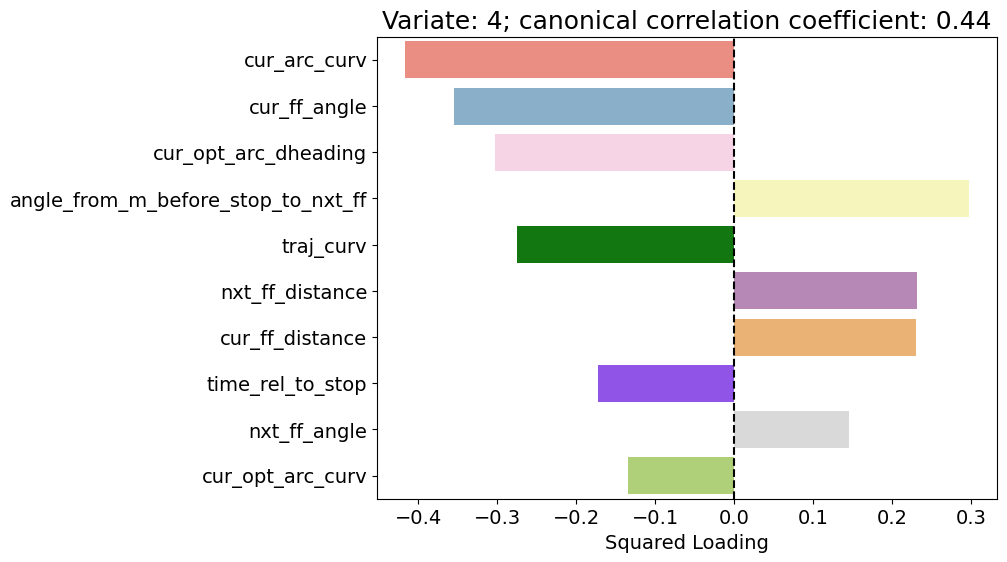

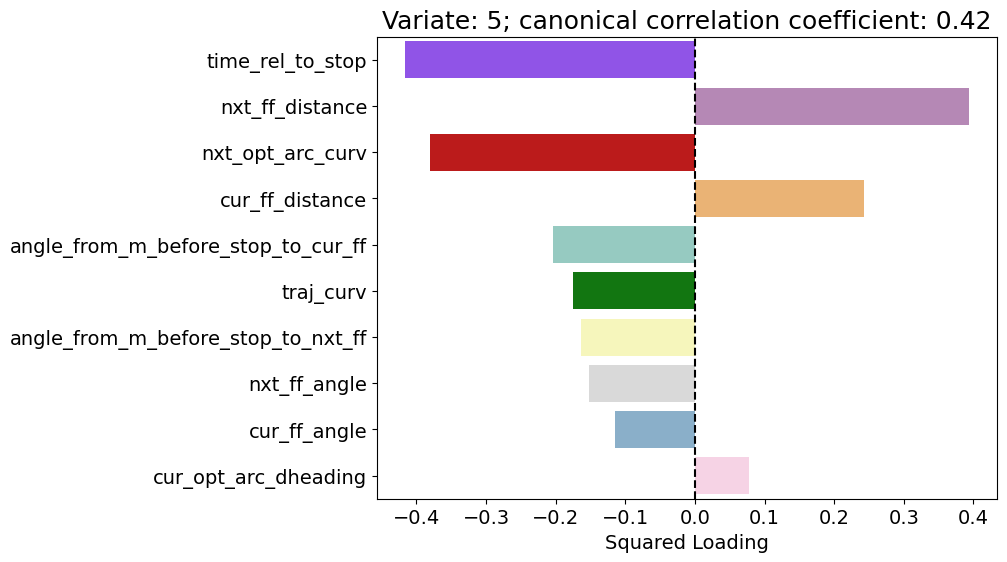

In [35]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2', squared=False)

## squared loadings

### neurons

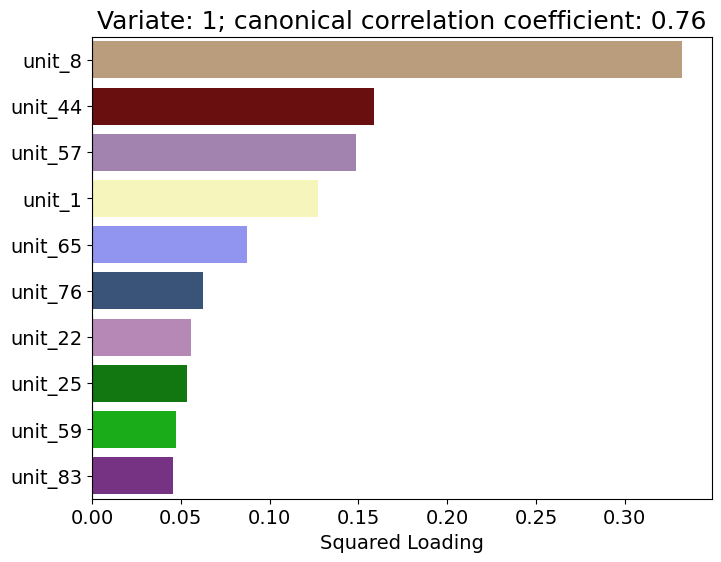

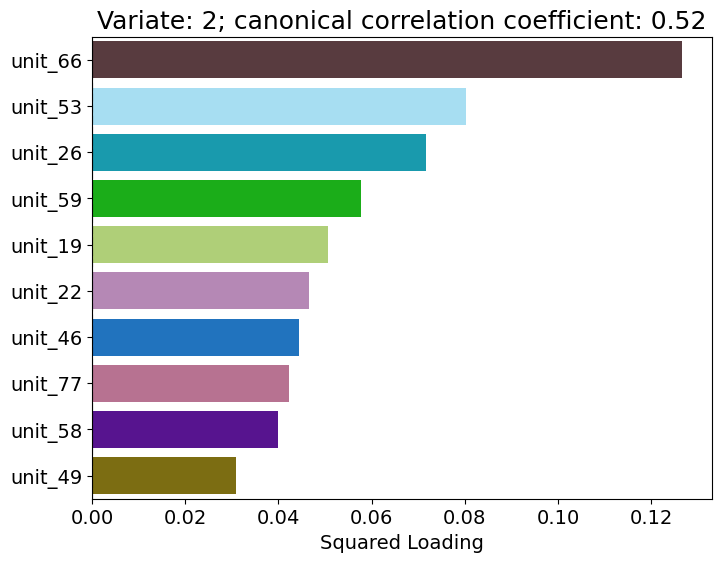

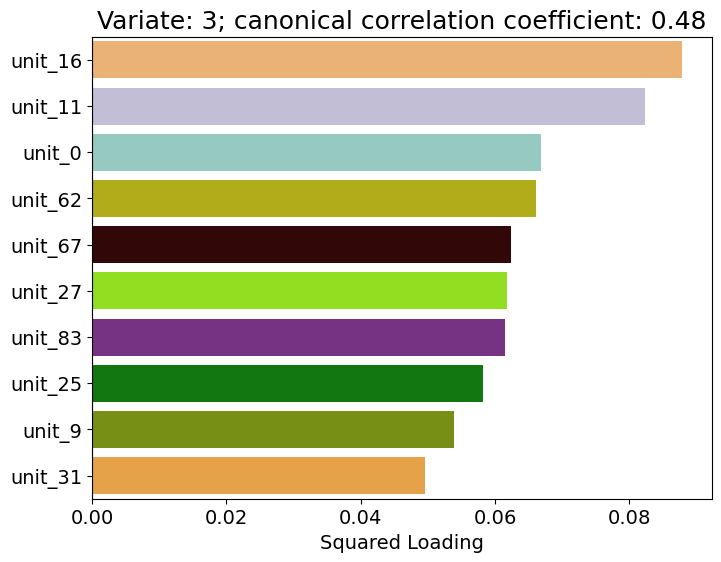

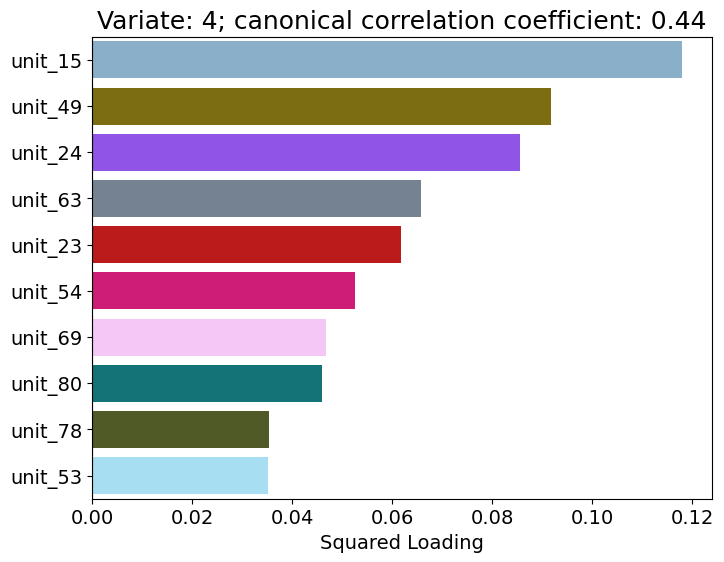

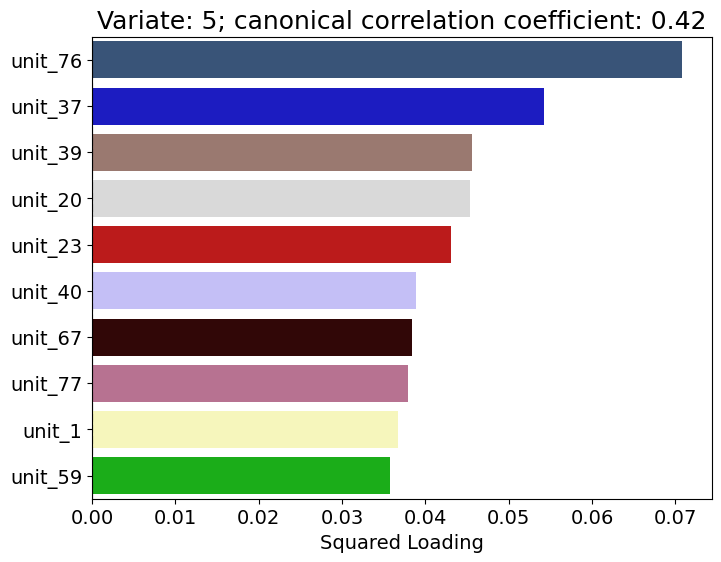

In [36]:
cca_inst.plot_ranked_loadings(X1_or_X2='X1')

### behavior

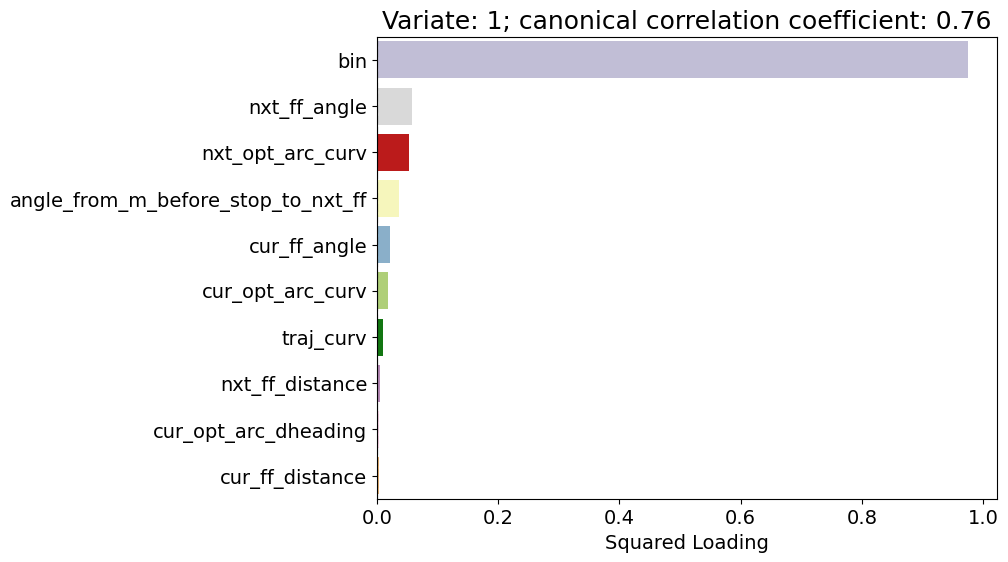

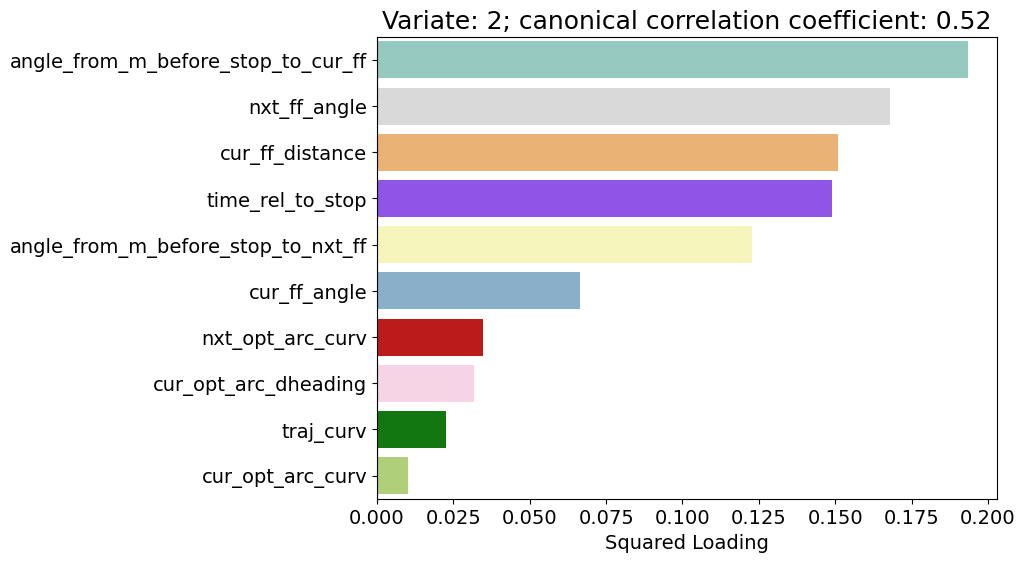

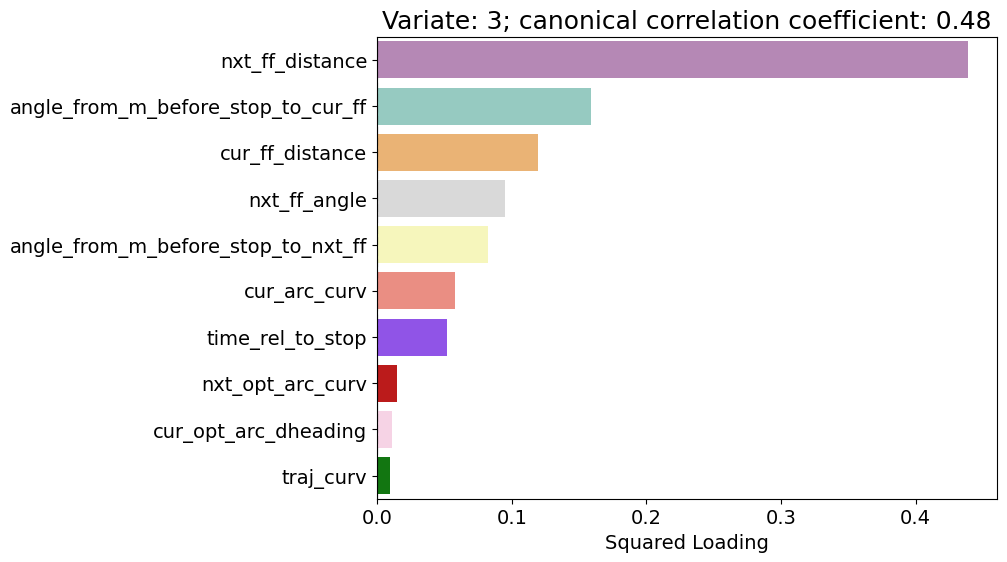

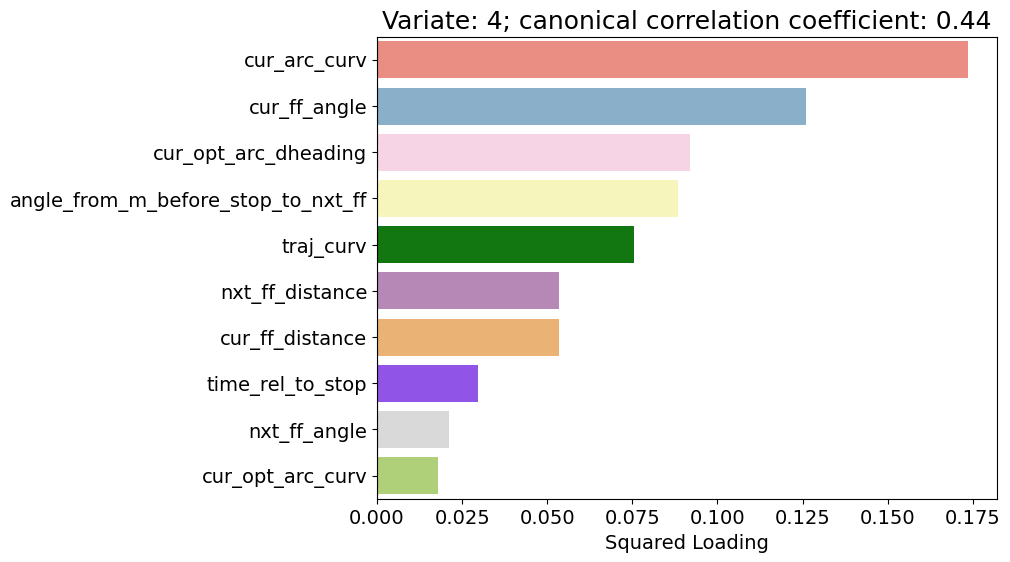

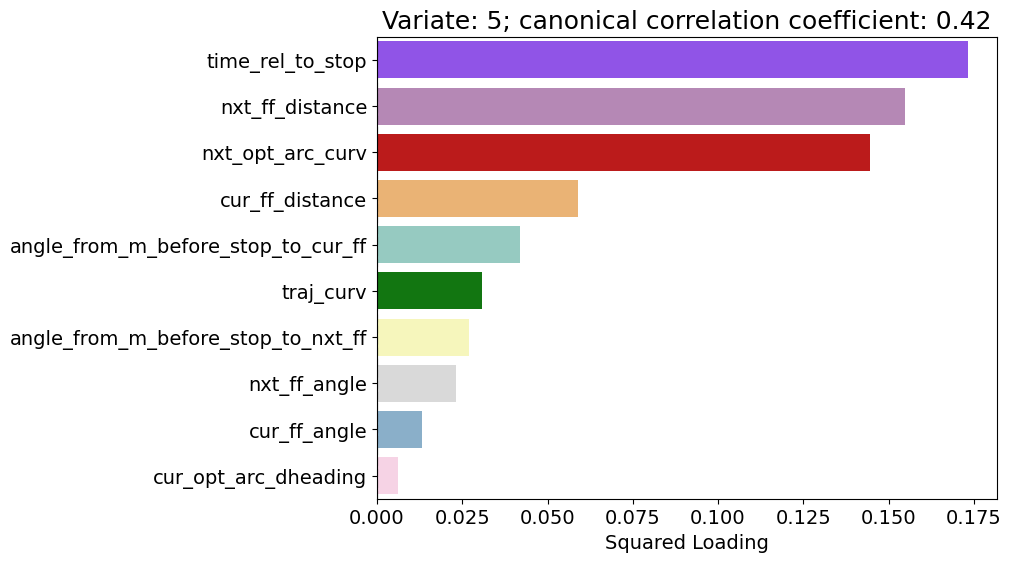

In [37]:
cca_inst.plot_ranked_loadings(X1_or_X2='X2')

## abs weights ranked

### neurons

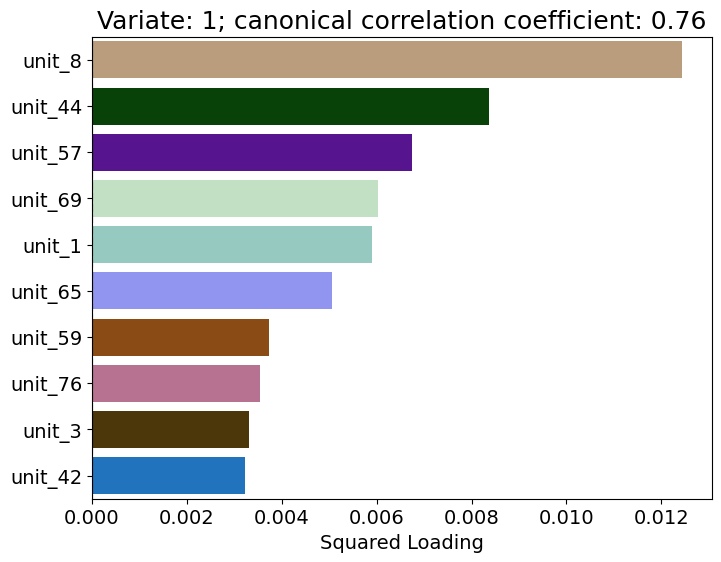

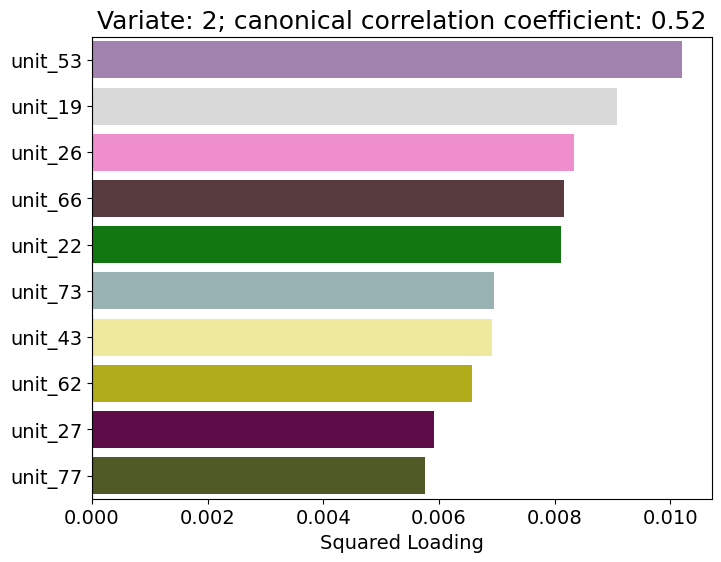

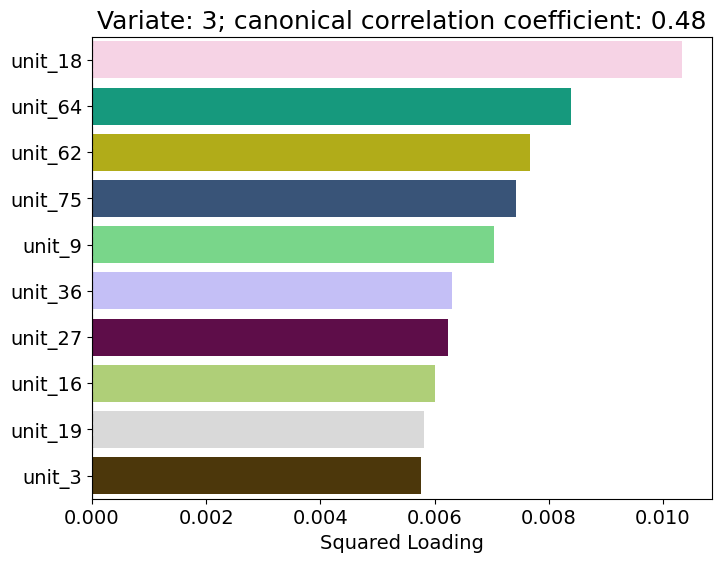

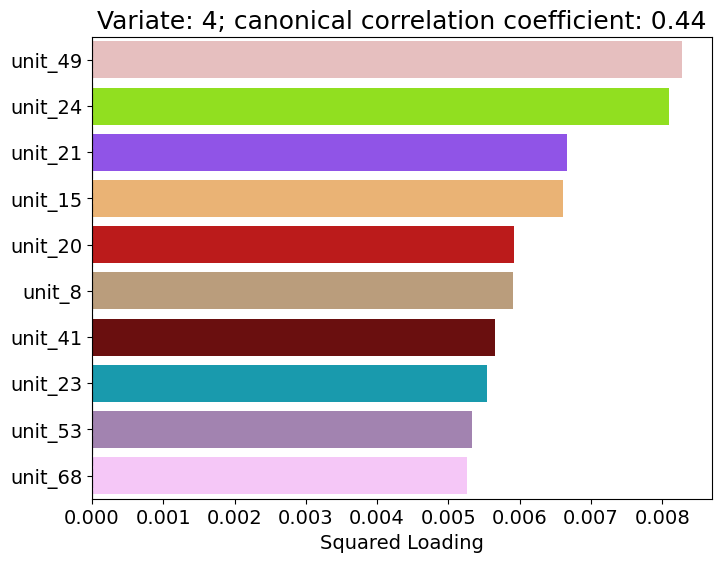

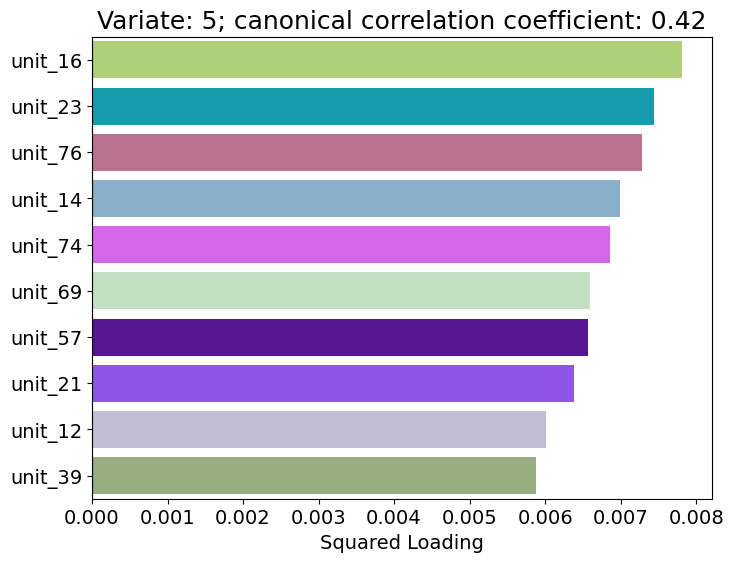

In [38]:
cca_inst.plot_ranked_weights()

### behavior

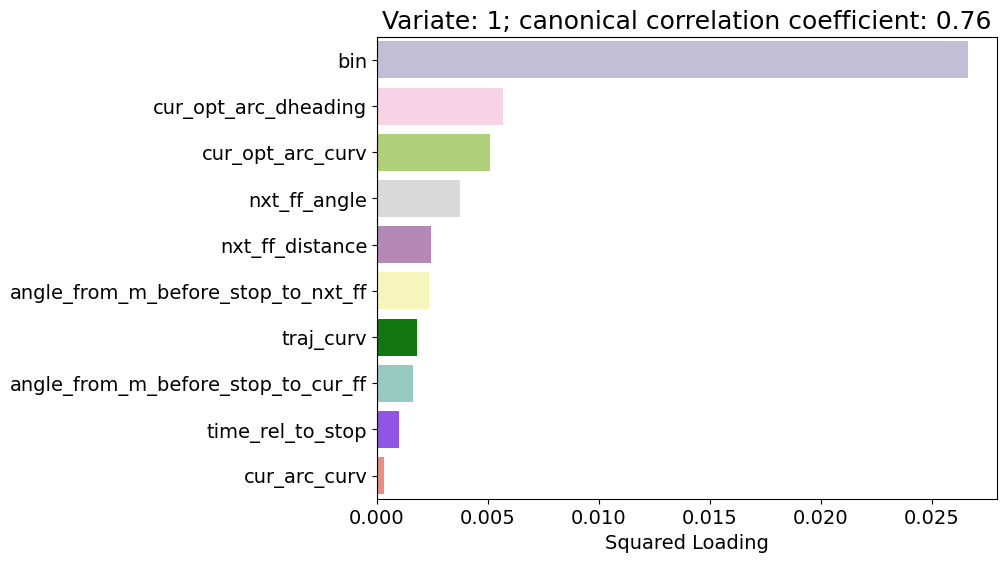

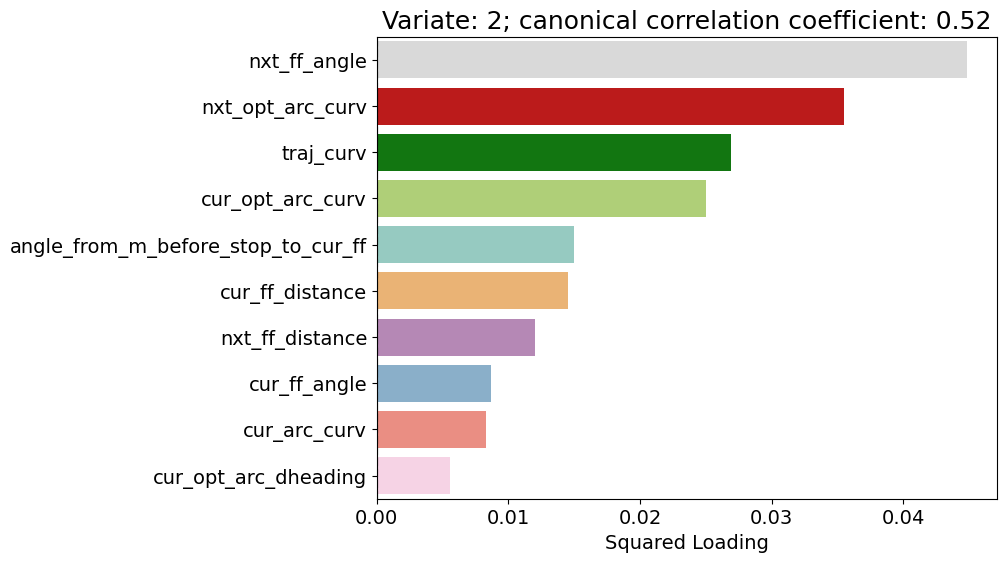

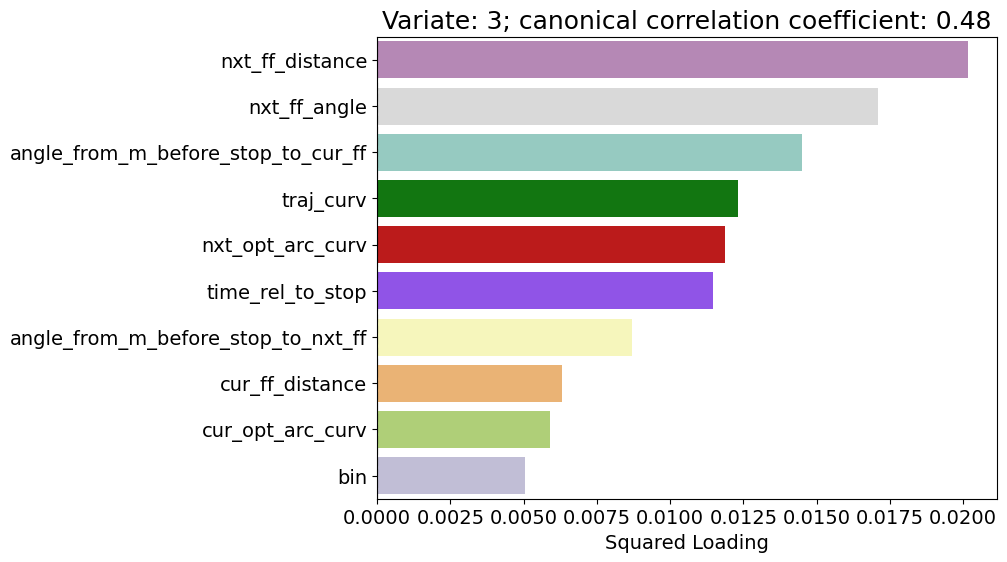

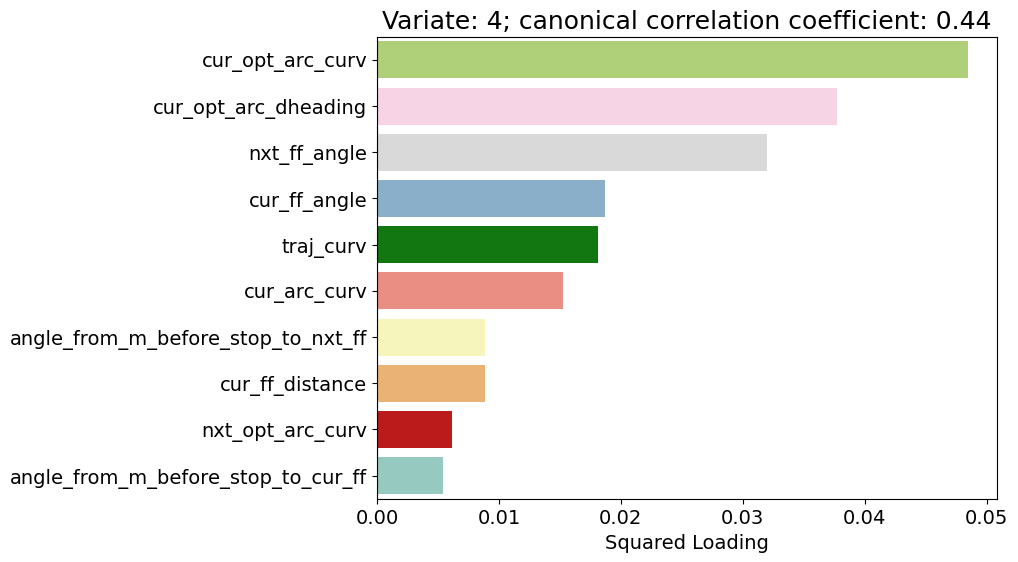

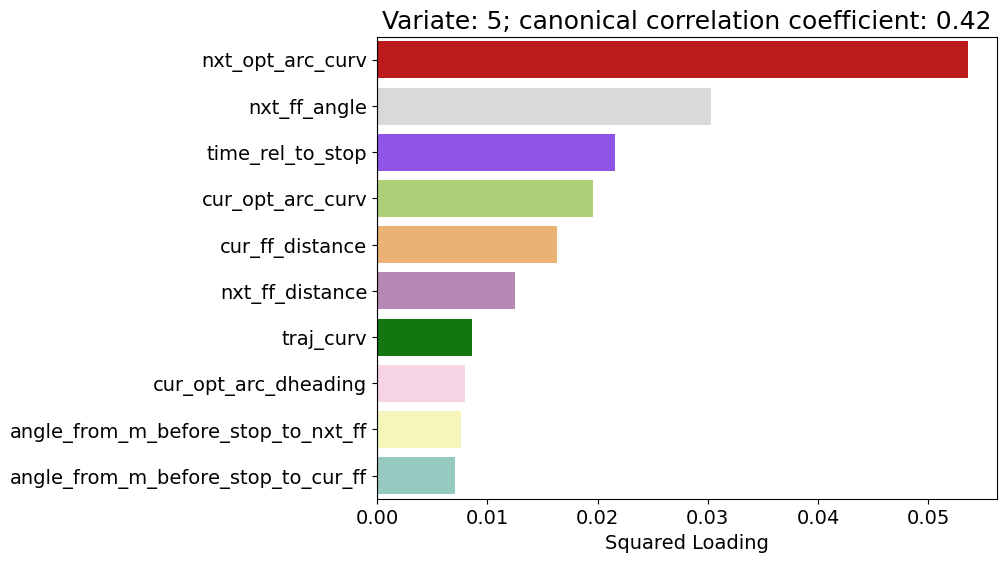

In [39]:
cca_inst.plot_ranked_weights(X1_or_X2='X2')

## plot real weights

### neurons

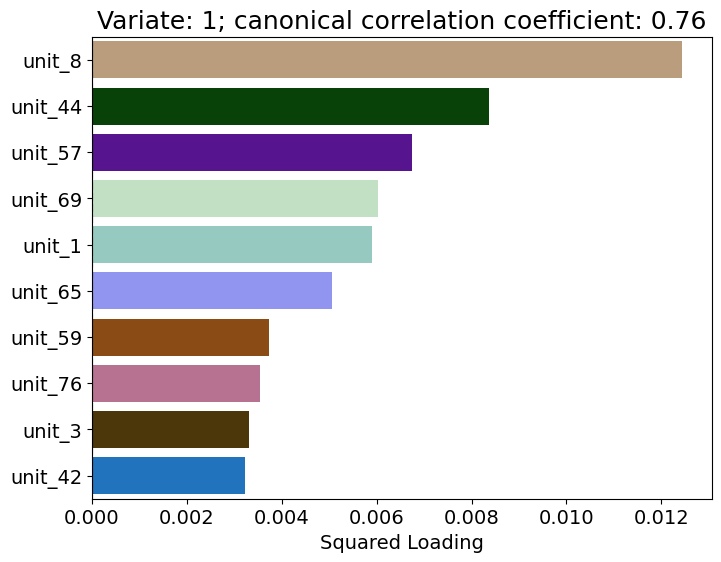

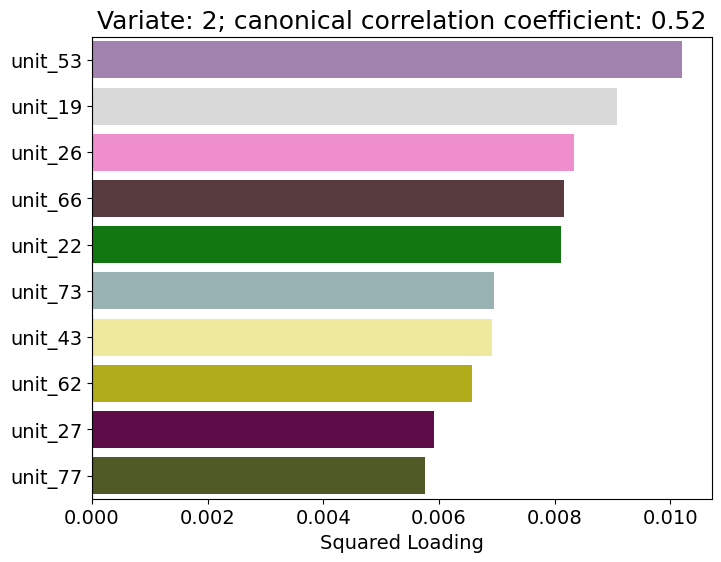

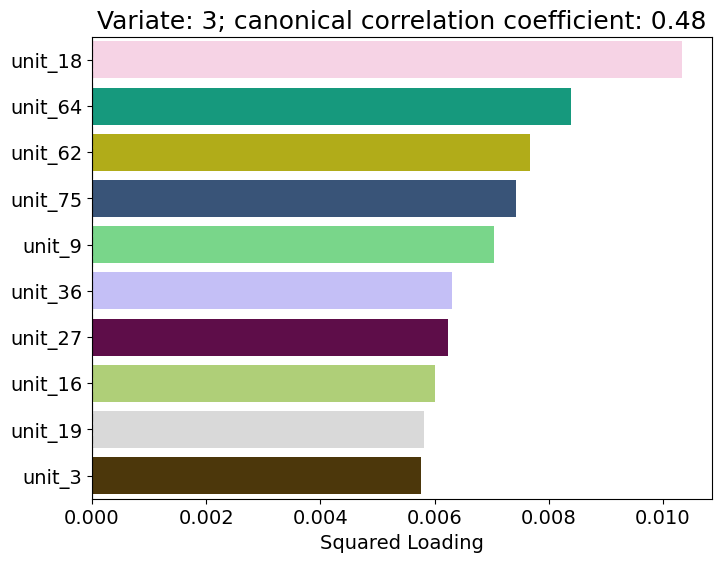

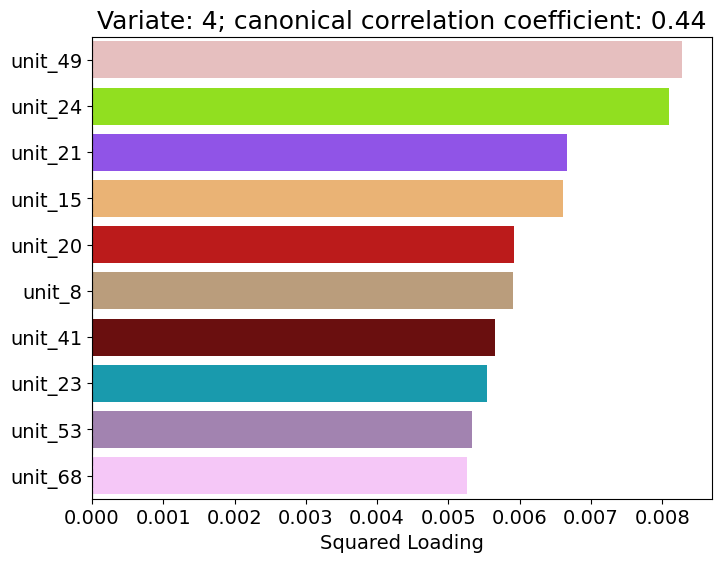

KeyboardInterrupt: 

In [40]:
cca_inst.plot_ranked_weights(abs_value=False)

### behavior

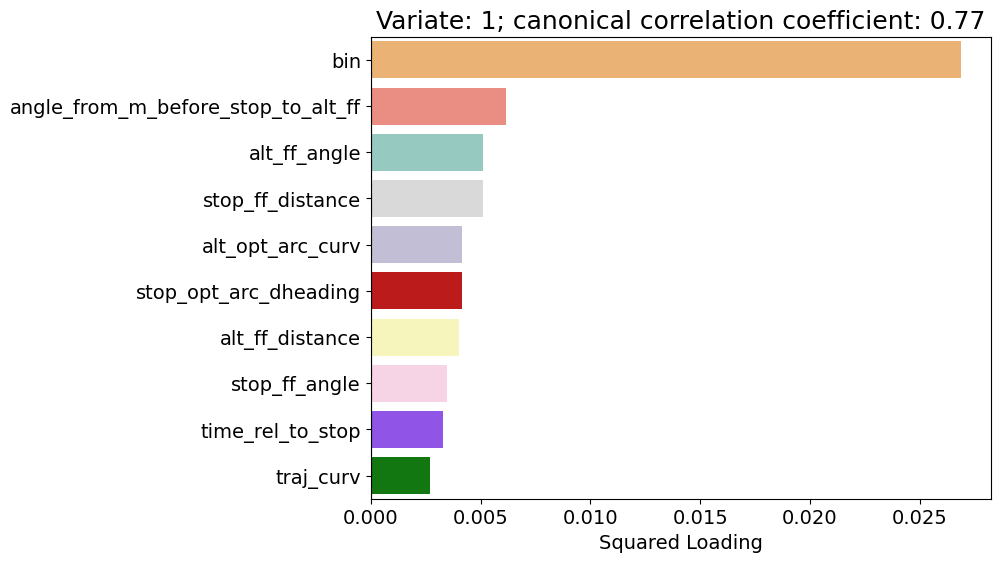

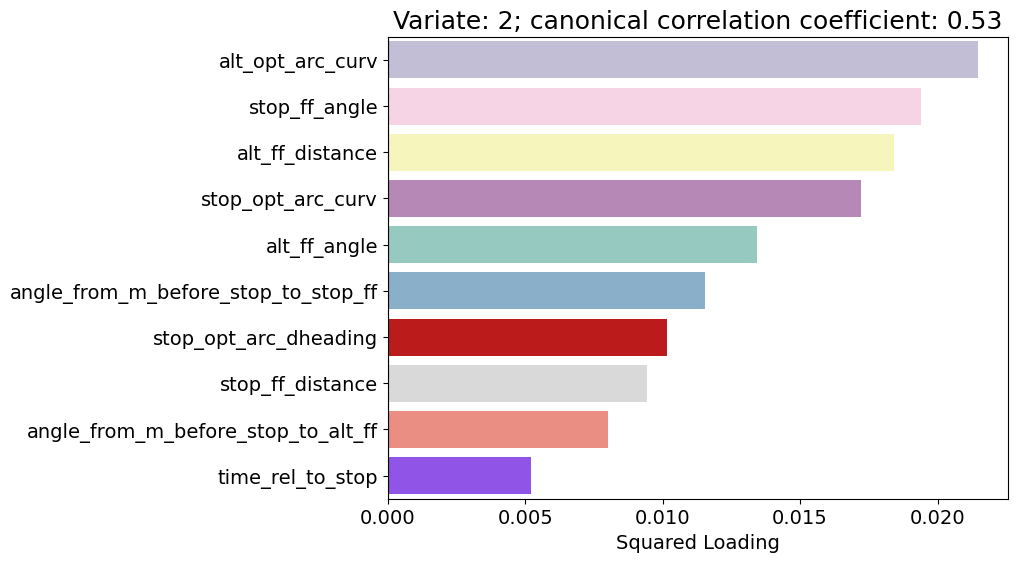

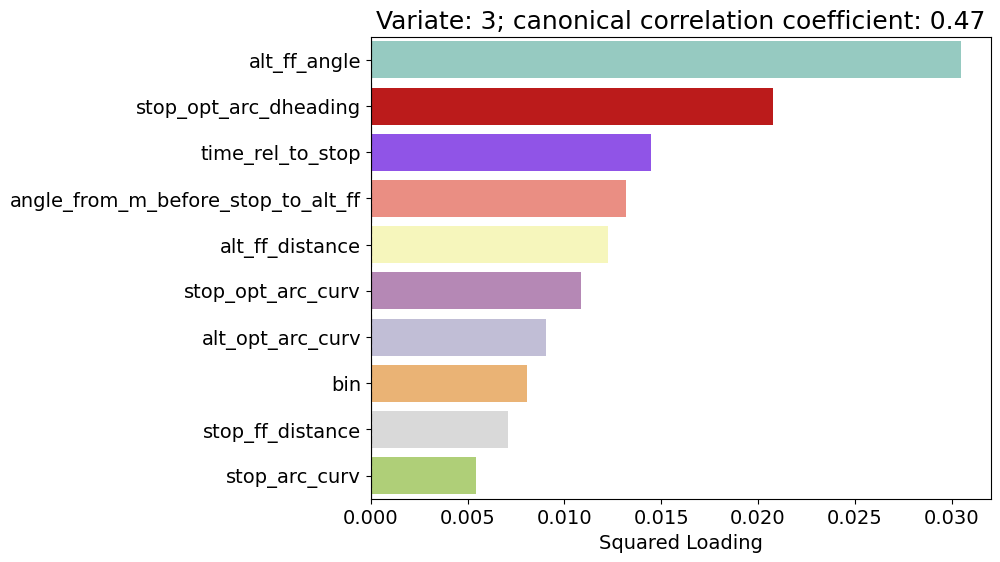

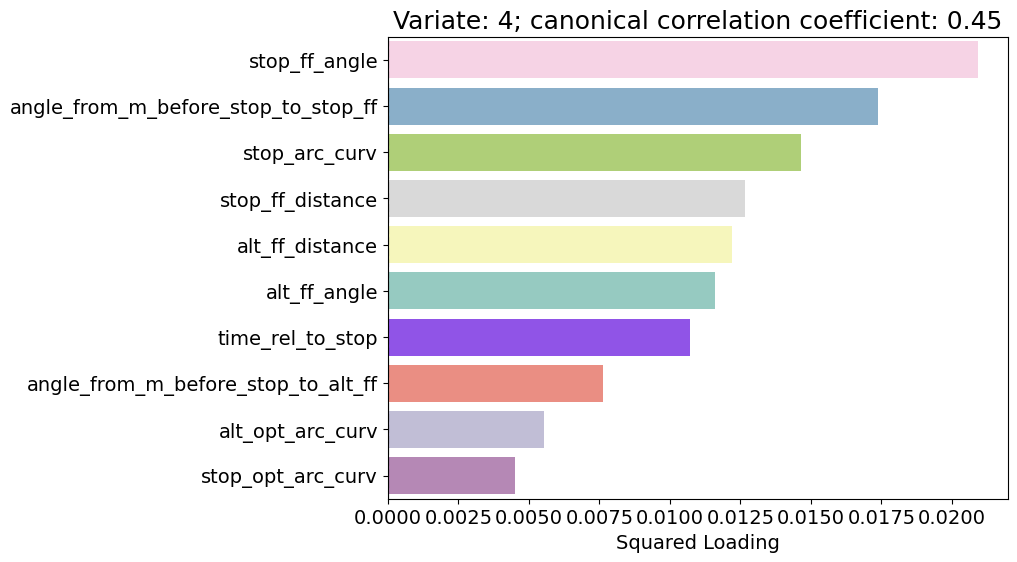

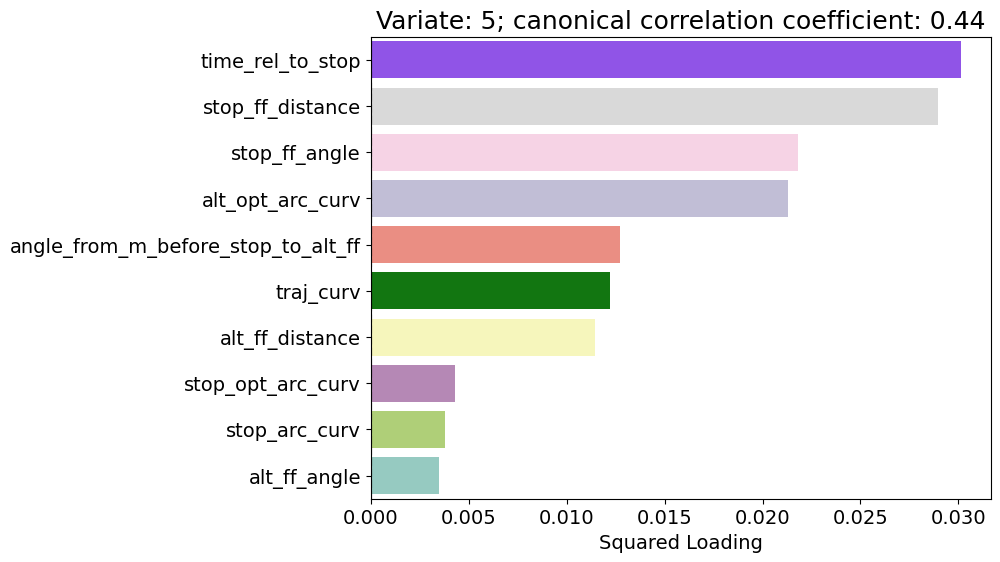

In [109]:
cca_inst.plot_ranked_weights(X1_or_X2='X2', abs_value=False)

In [110]:
stop here!

SyntaxError: invalid syntax (2745754519.py, line 1)

## distribution of each feature

In [113]:
cca_inst.X2_sc.shape

(643, 13)

In [114]:
X2_sc_df = pd.DataFrame(cca_inst.X2_sc, columns = cca_inst.X2.columns)
X2_sc_df.describe()

nxt_ff_angle  nxt_ff_distance  alt_opt_arc_curv  time_rel_to_stop  \
count     643.00000        643.00000         643.00000         643.00000   
mean        0.00000          0.00000           0.00000           0.00000   
std         1.00078          1.00078           1.00078           1.00078   
min        -3.06447         -2.16544          -3.96562          -1.57732   
25%        -0.59119         -0.70745          -0.55576          -0.83880   
50%        -0.00339         -0.02846           0.02744          -0.07506   
75%         0.55422          0.72042           0.59426           0.69499   
max         3.04556          2.89990           3.69564           3.08152   

       traj_curv  cur_ff_angle  cur_ff_distance  cur_arc_curv  \
count  643.00000      643.00000         643.00000      643.00000   
mean     0.00000       -0.00000          -0.00000        0.00000   
std      1.00078        1.00078           1.00078        1.00078   
min     -4.34350       -3.30498          -1.50602       -5.55899   
25%     -0.54890       -0.49543          -0.89544       -0.24500   
50%      0.05584        0.02315          -0.09456        0.01361   
75%      0.57181        0.56417           0.78160        0.27760   
max      3.79653        3.51721           2.61942        6.79992   

       cur_opt_arc_curv  cur_opt_arc_dheading       bin  \
count          643.00000              643.00000 643.00000   
mean            -0.00000                0.00000  -0.00000   
std              1.00078                1.00078   1.00078   
min             -4.43541               -4.43994  -1.49796   
25%             -0.41238               -0.21820  -0.92666   
50%              0.03549                0.00683  -0.07230   
75%              0.42158                0.26639   0.91524   
max              5.89334                4.41010   1.65778   

       angle_from_m_before_stop_to_cur_ff  angle_from_m_before_stop_to_nxt_ff  
count                            643.00000                           643.00000  
mean                               0.00000                             0.00000  
std                                1.00078                             1.00078  
min                               -1.57970                            -2.68969  
25%                               -0.91121                            -0.50680  
50%                               -0.01794                             0.00350  
75%                                0.92376                             0.66084  
max                                1.72121                             2.95743

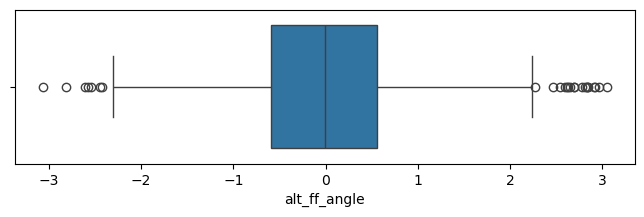

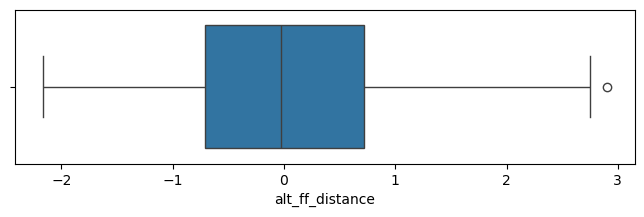

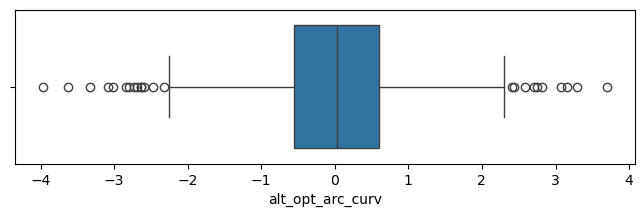

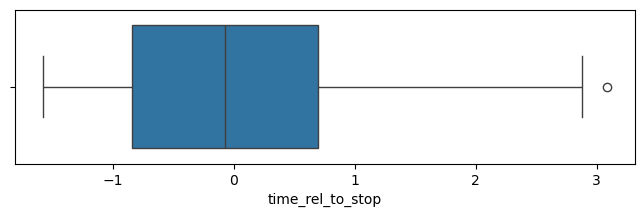

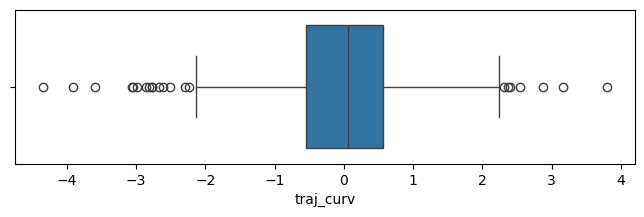

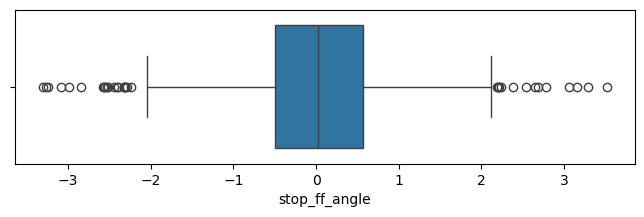

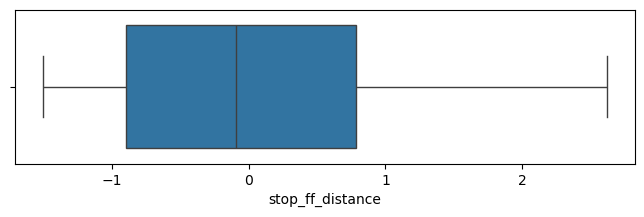

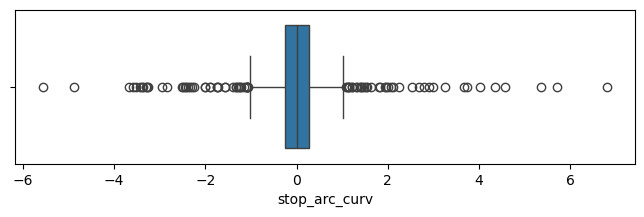

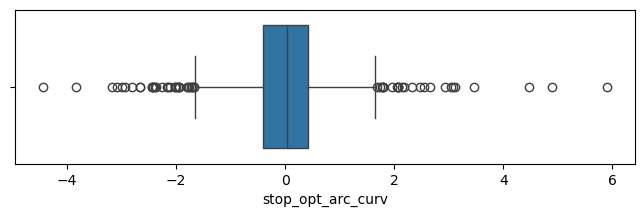

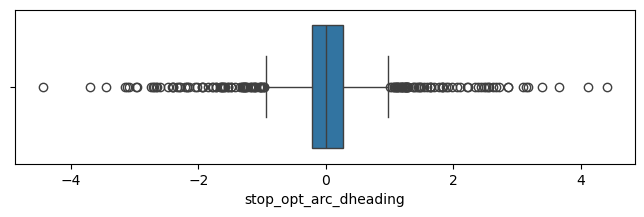

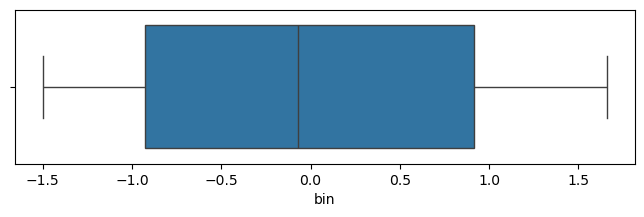

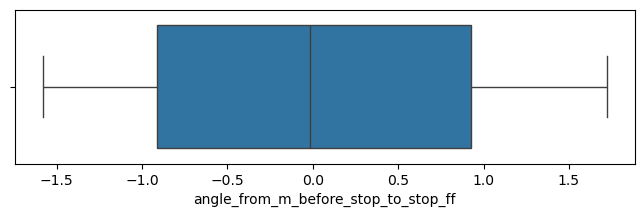

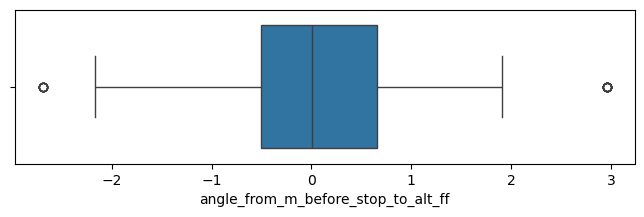

In [120]:
for column in X2_sc_df.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(X2_sc_df[column], orient='h')
    plt.show()
    

## heatmap of weights
raw canonical coefficients are interpreted in a manner analogous to interpreting regression coefficients. For example: a one unit increase in reading leads to a .0446 decrease in the first canonical variate of set 2 when all of the other variables are held constant (in some other data)

In [116]:
weight_df = cca_inst.X2_weight_df.copy()
weight_df = weight_df.set_index('feature').drop(columns='feature_category')

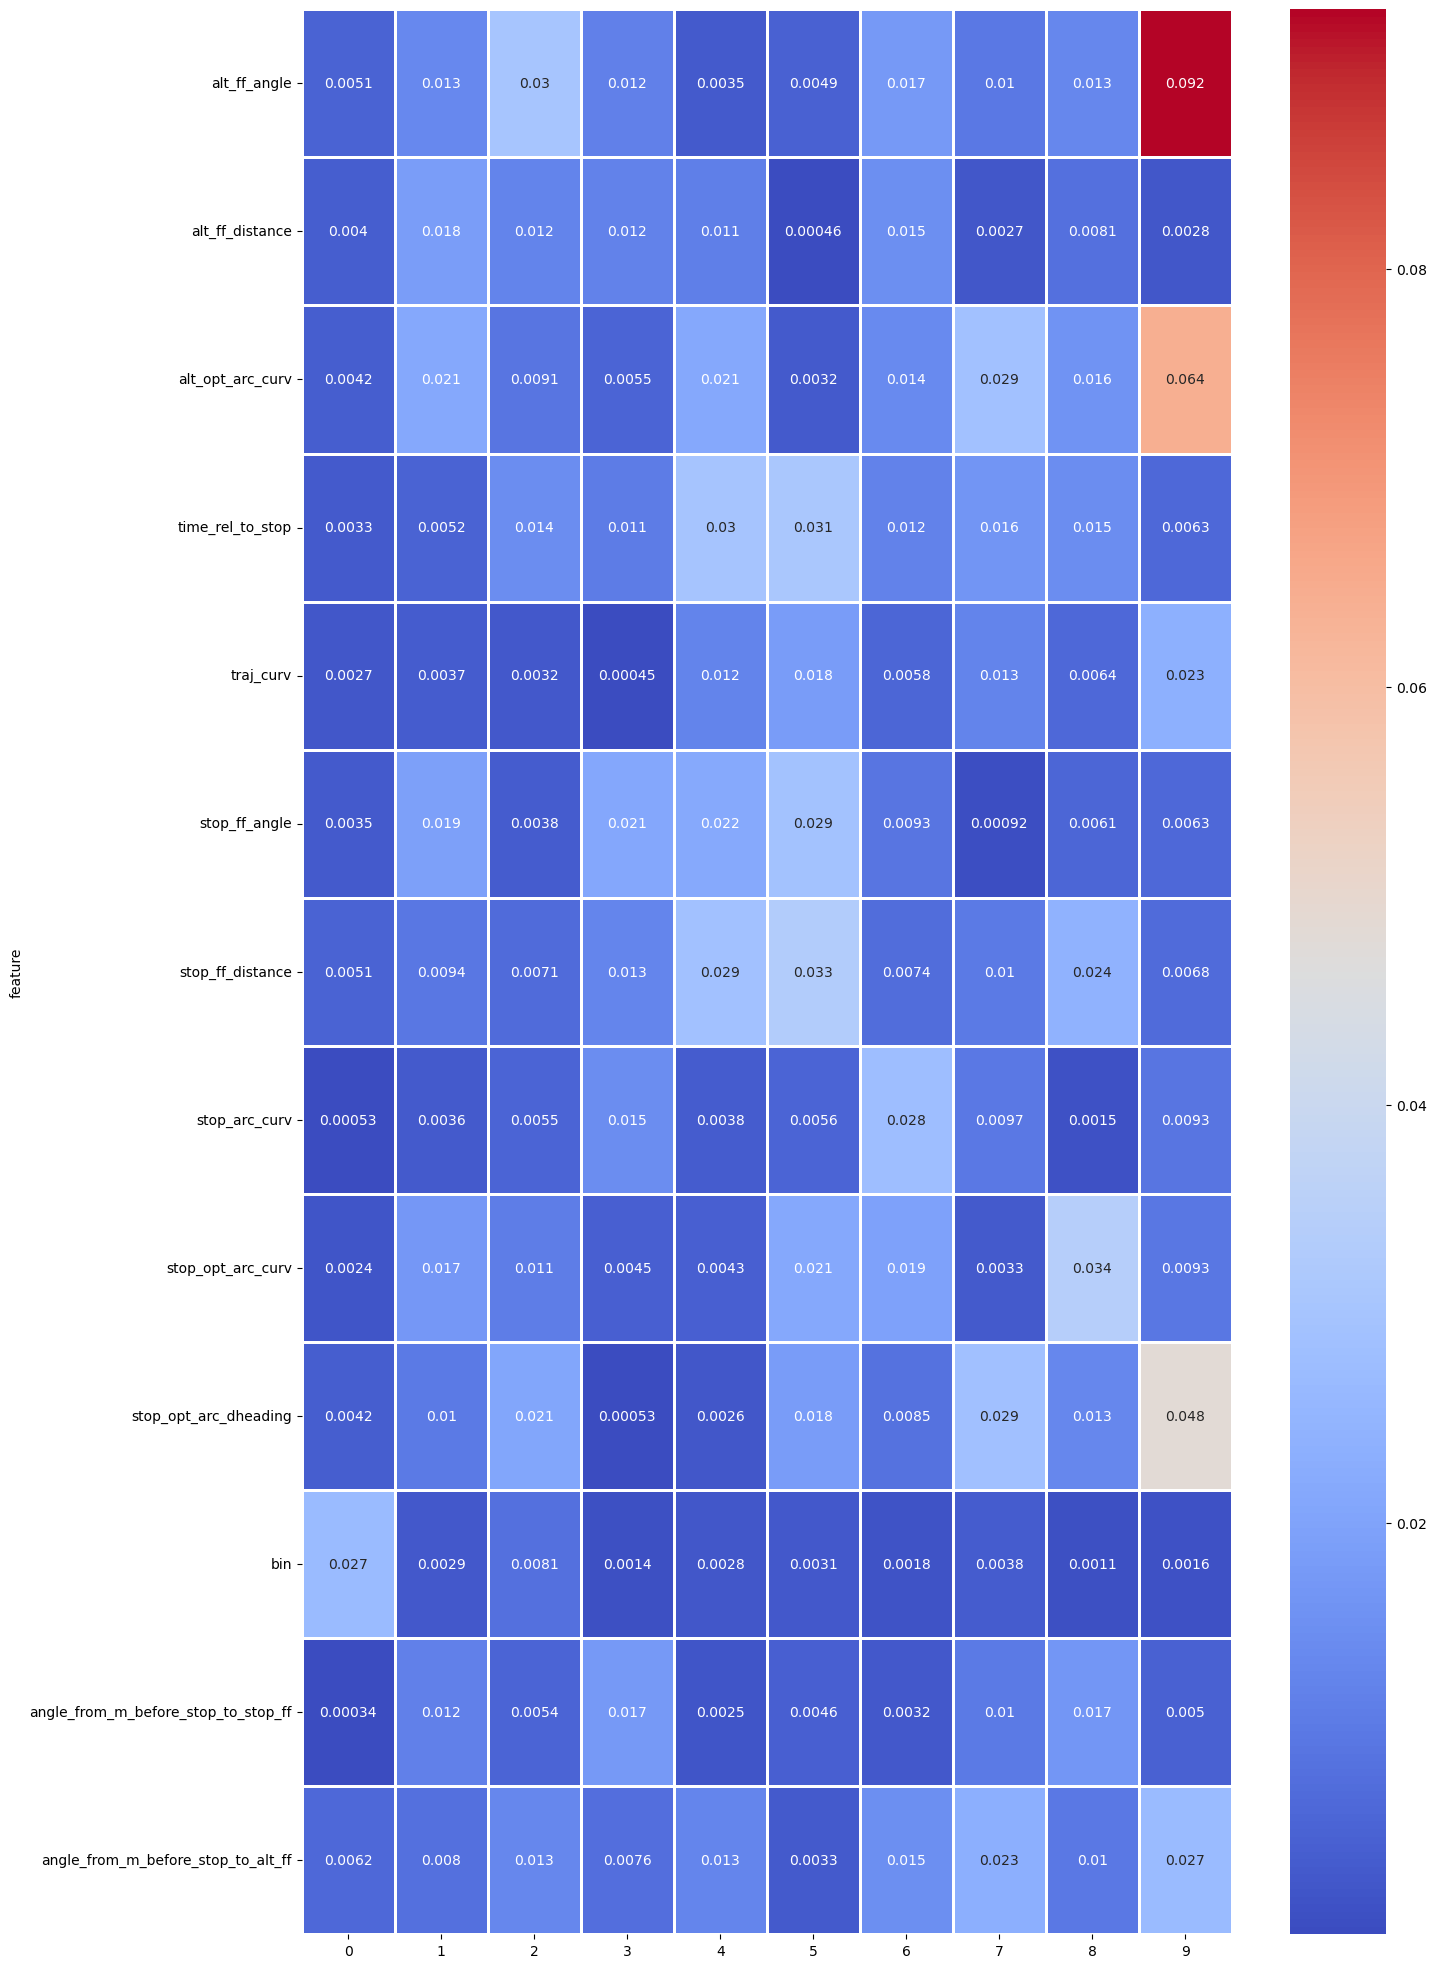

In [118]:
plt.subplots(figsize=(15, 25))
sns.heatmap(weight_df.iloc[:20, :10], cmap='coolwarm', annot=True, linewidths=1)
plt.show()

## train test split

In [ ]:
train1, test1, train2, test2 = train_test_split(cca_inst.X1_sc, cca_inst.X2_sc, test_size=0.3, random_state=42)
# use training and testing set
nComponents = 10
cca2 = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)
cca2.train([train1, train2])
testcorrs = cca2.validate([test1, test2])
testcorrs

Training CCA, kernel = None, regularization = 0.0000, 10 components


[array([ 0.16601,  0.27052, -0.04265,  0.21392,  0.07385,  0.04497,
         0.06918,  0.18854,  0.3288 , -0.04117,  0.10374,  0.41179,
         0.18181,  0.07008,  0.41278,  0.12765,  0.23815,  0.30137,
         0.13773,  0.32709,  0.40904,  0.42835,  0.36056,  0.16633,
         0.09906,  0.1593 ,  0.15809,  0.18762,  0.26092,  0.07841,
         0.1701 , -0.03962,  0.1092 ,  0.22486,  0.17081,  0.10919,
        -0.00575,  0.07872,  0.12964,  0.06004,  0.09885,  0.16676,
         0.24769,  0.14249,  0.45882,  0.14811,  0.45575, -0.00484,
         0.29337,  0.18232,  0.31452,  0.21348, -0.08977,  0.17961,
         0.06483,  0.07506,  0.1021 ,  0.19136,  0.23868,  0.1411 ,
         0.20266,  0.04708,  0.15282,  0.16654,  0.2962 ,  0.30952,
         0.12753,  0.07337,  0.09376,  0.14056,  0.04767,  0.37859,
         0.33603,  0.14019,  0.20891,  0.57302,  0.06753,  0.18801,
         0.09678,  0.038  ,  0.09279,  0.20425,  0.17003, -0.17356,
         0.14512,  0.11225]),
 array([ 0.72085, 

## compute explained variance

In [ ]:
cca2.compute_ev([test1, test2])

Computing explained variance for component #1
Computing explained variance for component #2
Computing explained variance for component #3
Computing explained variance for component #4
Computing explained variance for component #5
Computing explained variance for component #6
Computing explained variance for component #7
Computing explained variance for component #8
Computing explained variance for component #9
Computing explained variance for component #10


[array([[0.29637, 0.47038, 0.0378 , 0.36736, 0.14814, 0.26158, 0.0574 ,
         0.40039, 0.35631, 0.09605, 0.20393, 0.39169, 0.25049, 0.30972,
         0.40985, 0.1003 , 0.35105, 0.37228, 0.29432, 0.28156, 0.42894,
         0.09537, 0.45769, 0.31349, 0.26853, 0.32976, 0.38649, 0.34388,
         0.43198, 0.20538, 0.28921, 0.0131 , 0.25439, 0.25955, 0.11433,
         0.24517, 0.19142, 0.36757, 0.44289, 0.06147, 0.40519, 0.26793,
         0.26298, 0.26871, 0.50794, 0.06231, 0.54603, 0.16127, 0.35585,
         0.34024, 0.34508, 0.34122, 0.09512, 0.42817, 0.27054, 0.17302,
         0.37314, 0.34602, 0.41733, 0.27742, 0.22038, 0.29469, 0.22737,
         0.27435, 0.482  , 0.39625, 0.28468, 0.3218 , 0.28524, 0.16089,
         0.3863 , 0.44471, 0.31012, 0.13947, 0.17785, 0.52656, 0.23378,
         0.28259, 0.29749, 0.03473, 0.33107, 0.37959, 0.24742, 0.1145 ,
         0.19848, 0.13219],
        [0.16685, 0.19671, 0.13099, 0.25375, 0.08233, 0.07183, 0.1471 ,
         0.0396 , 0.06539, 0.27389, 

## test for p values

In [ ]:
stats_cca = CanCorr(cca_inst.X1_sc, cca_inst.X2_sc)
print(stats_cca.corr_test().summary())
neural_data_modeling.print_weights('X', stats_cca.x_cancoef)
neural_data_modeling.print_weights('Z', stats_cca.y_cancoef)

                              Cancorr results
   Canonical Correlation Wilks' lambda   Num DF     Den DF   F Value Pr > F
---------------------------------------------------------------------------
0                 0.8285        0.0208 3698.0000 547860.8057 15.6925 0.0000
1                 0.6838        0.0663 3570.0000 536405.3663 11.2254 0.0000
2                 0.6092        0.1245 3444.0000 524911.9670  8.8637 0.0000
3                 0.5047        0.1980 3320.0000 513379.2826  7.1067 0.0000
4                 0.4896        0.2656 3198.0000 501805.9337  6.0168 0.0000
5                 0.4324        0.3494 3078.0000 490190.4845  4.9415 0.0000
6                 0.4096        0.4297 2960.0000 478531.4418  4.1163 0.0000
7                 0.3536        0.5163 2844.0000 466827.2525  3.3447 0.0000
8                 0.3113        0.5901 2730.0000 455076.3024  2.7753 0.0000
9                 0.2571        0.6534 2618.0000 443276.9151  2.3315 0.0000
10                0.2159        0.6997 250

# PGAM (unfinished)

In [ ]:
## Categorize variables
data_item.y_var.columns
temporal_vars = ['time_rel_to_stop',
 'time_when_nxt_ff_first_seen_rel_to_stop',
 'time_when_cur_ff_first_seen_rel_to_stop',
 'time_when_nxt_ff_last_seen_rel_to_stop',
 'time_when_cur_ff_last_seen_rel_to_stop',
 ]

spatial_vars = [x for x in data_item.y_var.columns if x not in temporal_vars]
spatial_vars